In [ ]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import scipy.stats as stats


In [ ]:
data=pd.read_csv("/content/credit_score (1).csv")
data.shape

(100000, 28)

In [ ]:
data['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [ ]:
data.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [ ]:
data["Age"].max()

56.0

In [ ]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [ ]:
outliers=find_outliers_IQR(data["Monthly_Inhand_Salary"])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers: 2017
max outlier value: 15204.633333333331
min outlier value: 12461.296666666669


In [ ]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1
data1= data.select_dtypes(include=['float', 'int'])
upper_lim=q3+1.5*IQR
lower_lim=q1-1.5*IQR


In [ ]:
data1

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,5634,3392,1,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,...,3.0,7.0,11.27,4.0,809.98,26.822620,265.0,49.574949,21.465380,312.494089
1,5635,3392,2,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,...,3.0,4.0,11.27,4.0,809.98,31.944960,266.0,49.574949,21.465380,284.629162
2,5636,3392,3,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,...,3.0,7.0,11.27,4.0,809.98,28.609352,267.0,49.574949,21.465380,331.209863
3,5637,3392,4,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,...,5.0,4.0,6.27,4.0,809.98,31.377862,268.0,49.574949,21.465380,223.451310
4,5638,3392,5,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,...,6.0,4.0,11.27,4.0,809.98,24.797347,269.0,49.574949,21.465380,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,7.0,...,23.0,7.0,11.50,3.0,502.38,34.663572,378.0,35.104023,24.028477,479.866228
99996,155626,37932,5,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,7.0,...,18.0,7.0,11.50,3.0,502.38,40.565631,379.0,35.104023,24.028477,496.651610
99997,155627,37932,6,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,7.0,...,27.0,6.0,11.50,3.0,502.38,41.255522,380.0,35.104023,24.028477,516.809083
99998,155628,37932,7,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,7.0,...,20.0,6.0,11.50,3.0,502.38,33.638208,381.0,35.104023,24.028477,319.164979


In [ ]:
for i in range(21):
    data1.iloc[:,i]=np.where(data1.iloc[:,i]>upper_lim[i],upper_lim[i],np.where(data1.iloc[:,i]<lower_lim[i],lower_lim[i],data1.iloc[:,i]))

In [ ]:
data1

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,5634.0,3392.0,1.0,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,...,3.0,7.0,11.27,4.0,809.98,26.822620,265.0,49.574949,21.465380,312.494089
1,5635.0,3392.0,2.0,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,...,3.0,4.0,11.27,4.0,809.98,31.944960,266.0,49.574949,21.465380,284.629162
2,5636.0,3392.0,3.0,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,...,3.0,7.0,11.27,4.0,809.98,28.609352,267.0,49.574949,21.465380,331.209863
3,5637.0,3392.0,4.0,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,...,5.0,4.0,6.27,4.0,809.98,31.377862,268.0,49.574949,21.465380,223.451310
4,5638.0,3392.0,5.0,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,...,6.0,4.0,11.27,4.0,809.98,24.797347,269.0,49.574949,21.465380,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625.0,37932.0,4.0,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,7.0,...,23.0,7.0,11.50,3.0,502.38,34.663572,378.0,35.104023,24.028477,479.866228
99996,155626.0,37932.0,5.0,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,7.0,...,18.0,7.0,11.50,3.0,502.38,40.565631,379.0,35.104023,24.028477,496.651610
99997,155627.0,37932.0,6.0,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,7.0,...,27.0,6.0,11.50,3.0,502.38,41.255522,380.0,35.104023,24.028477,516.809083
99998,155628.0,37932.0,7.0,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,7.0,...,20.0,6.0,11.50,3.0,502.38,33.638208,381.0,35.104023,24.028477,319.164979


In [ ]:
merged_data=pd.merge(data,data1,on=['ID','Customer_ID','Month','Age','SSN','Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts','Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan','Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age','Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],how='left')

In [ ]:
merged_data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


df["Monthly_Inhand_Salary"] = np.where(df["Monthly_Inhand_Salary"] > upper_lim,upper_lim,np.where(df["Monthly_Inhand_Salary"] < lower_lim,lower_lim,df["Monthly_Inhand_Salary"]))

In [ ]:
data["Monthly_Inhand_Salary"] 

0        1824.843333
1        1824.843333
2        1824.843333
3        1824.843333
4        1824.843333
            ...     
99995    3359.415833
99996    3359.415833
99997    3359.415833
99998    3359.415833
99999    3359.415833
Name: Monthly_Inhand_Salary, Length: 100000, dtype: float64

In [ ]:
data.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [ ]:
a = []
x = 0
for i in data['Type_of_Loan'].unique():
    x = i.split(',')
    for v in x:
        v = v.replace('and', '').strip(' ')
        if v not in a and v != '':
            a.append(v)
distinct_loan = pd.DataFrame({'Distinct Loan Type': a})
distinct_loan

,Distinct Loan Type
0,Auto Loan
1,Credit-Builder Loan
2,Personal Loan
3,Home Equity Loan
4,Not Specified
5,No Data
6,Mortgage Loan
7,Student Loan
8,Debt Consolidation Loan
9,Payday Loan


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [ ]:
# Convert credit score from string to numerical value
'''data["Credit_Score"] = data["Credit_Score"].replace({"Poor": 0, "Standard": 1, "Good": 2})

# Subset data for income and credit score
df= data[["Annual_Income", "Credit_Score"]]
data["Credit_Score"] = data["Credit_Score"].astype("int")'''

'data["Credit_Score"] = data["Credit_Score"].replace({"Poor": 0, "Standard": 1, "Good": 2})\n\n# Subset data for income and credit score\ndf= data[["Annual_Income", "Credit_Score"]]\ndata["Credit_Score"] = data["Credit_Score"].astype("int")'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

from pandas.io.formats.info import DataFrameInfo

# Calculate mean credit score for low and high income groups
low_income_mean = df.loc[data["Annual_Income"] < 50000, "Credit_Score"].mean()
high_income_mean = df.loc[data["Annual_Income"] >= 50000, "Credit_Score"].mean()

# Perform hypothesis test
t_stat, p_val = stats.ttest_ind(df.loc[data["Annual_Income"] < 50000, "Credit_Score"], df.loc[data["Annual_Income"] >= 50000, "Credit_Score"], equal_var=False)

# Print results
print("Mean credit score for low income group:", low_income_mean)
print("Mean credit score for high income group:", high_income_mean)
print("t-statistic:", t_stat)
print("p-value:", p_val)


In [ ]:
loan_types = []
for index in data.index:
    temp = data.Type_of_Loan[index].replace('and ', '').split(', ')
    for i in temp: #loan in temp array
        if i not in loan_types: #if loan is not in loan_types
            loan_types.append(i) #add it
for loan in loan_types:
    data[loan] = 0 #create the loan column in the df with 0
    for index in data.index:
        temp = data.Type_of_Loan[index].replace('and ', '').split(', ')
        if loan in temp:
            data.loc[index, loan] = 1

In [ ]:
num_of_each_loan = [[],[]]
# refernce data from 2.4
for i in distinct_loan['Distinct Loan Type']:
    a = 0
    for x in data['Type_of_Loan']:
        if i in x: 
            a += x.count(i)
    num_of_each_loan[0].append(i)
    num_of_each_loan[1].append(a)
total_num_of_each_loan = pd.DataFrame({'Loan_type':num_of_each_loan[0], 'Total_number':num_of_each_loan[1]})
total_num_of_each_loan

,Loan_type,Total_number
0,Auto Loan,37992
1,Credit-Builder Loan,40440
2,Personal Loan,38888
3,Home Equity Loan,39104
4,Not Specified,39616
5,No Data,11408
6,Mortgage Loan,38936
7,Student Loan,38968
8,Debt Consolidation Loan,38776
9,Payday Loan,40568


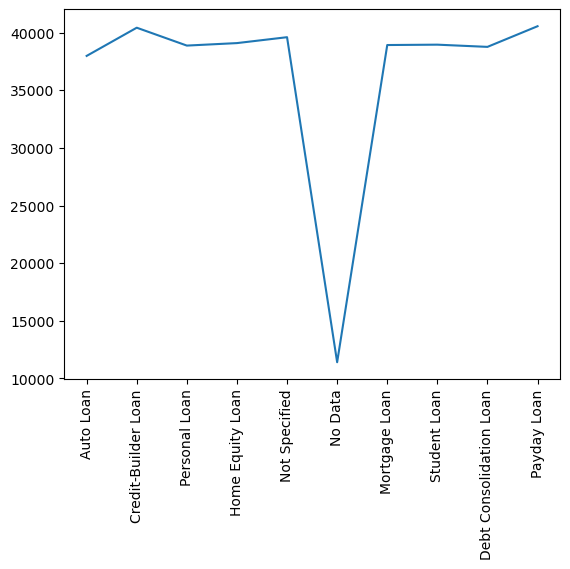

In [ ]:
plt.plot(num_of_each_loan[0],num_of_each_loan[1])
plt.xticks(rotation=90)
plt.show()

In [ ]:
outliers=find_outliers_IQR(data["Monthly_Inhand_Salary"])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers: 2017
max outlier value: 15204.633333333331
min outlier value: 12461.296666666669


In [ ]:
data["Delay_from_due_date"].max()

62.0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

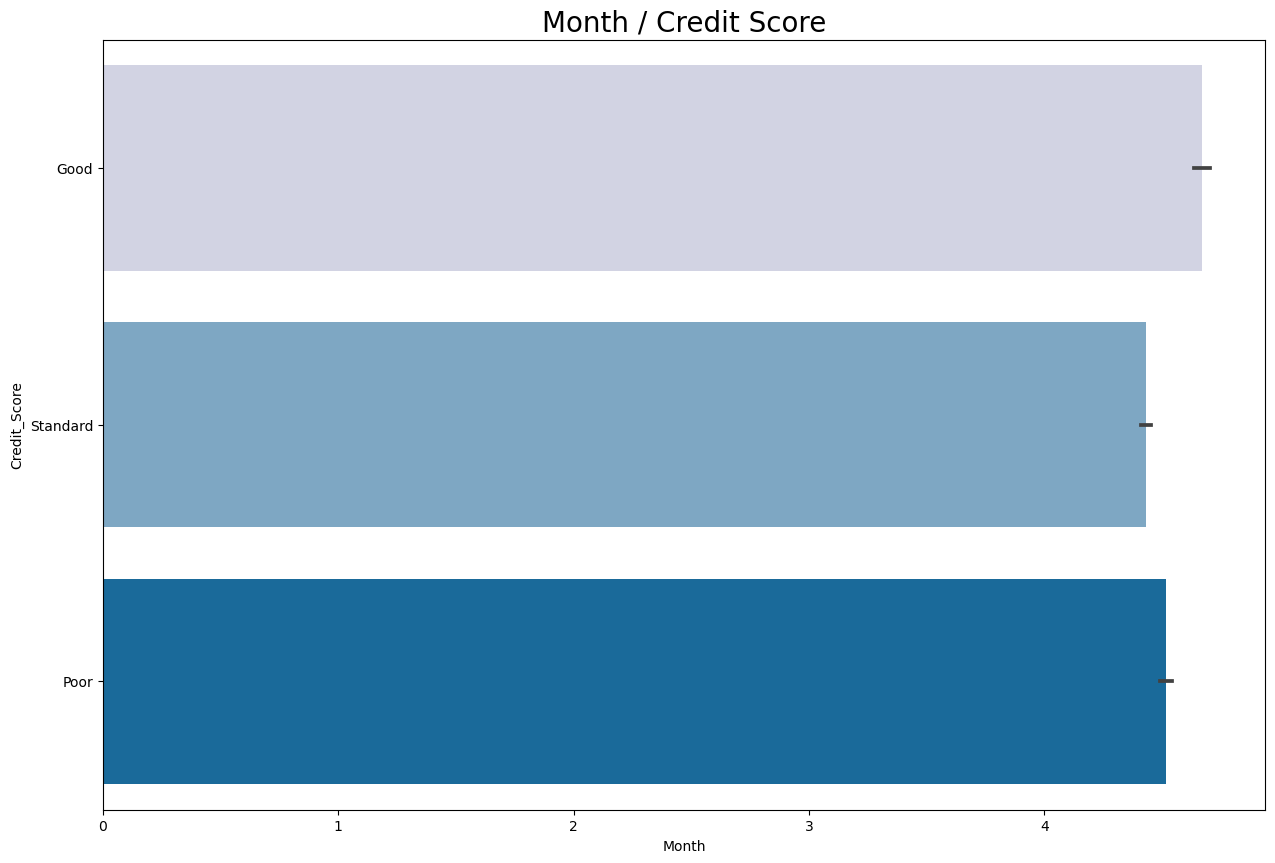

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x="Month", y="Credit_Score", data=data, palette="PuBu")
plt.title("Month / Credit Score", fontsize=20)
plt.show()

In [ ]:
#There is no big differnece when comparing Month values.

In [ ]:
#Make Age Range 10, 20, 30, 40, 50 and check out what happen.

age_range = [i // 10 for i in data["Age"]]

data["Age_Range"] = age_range

data["Age_Range"].value_counts()

3.0    29080
2.0    28819
4.0    22396
1.0    11170
5.0     8535
Name: Age_Range, dtype: int64

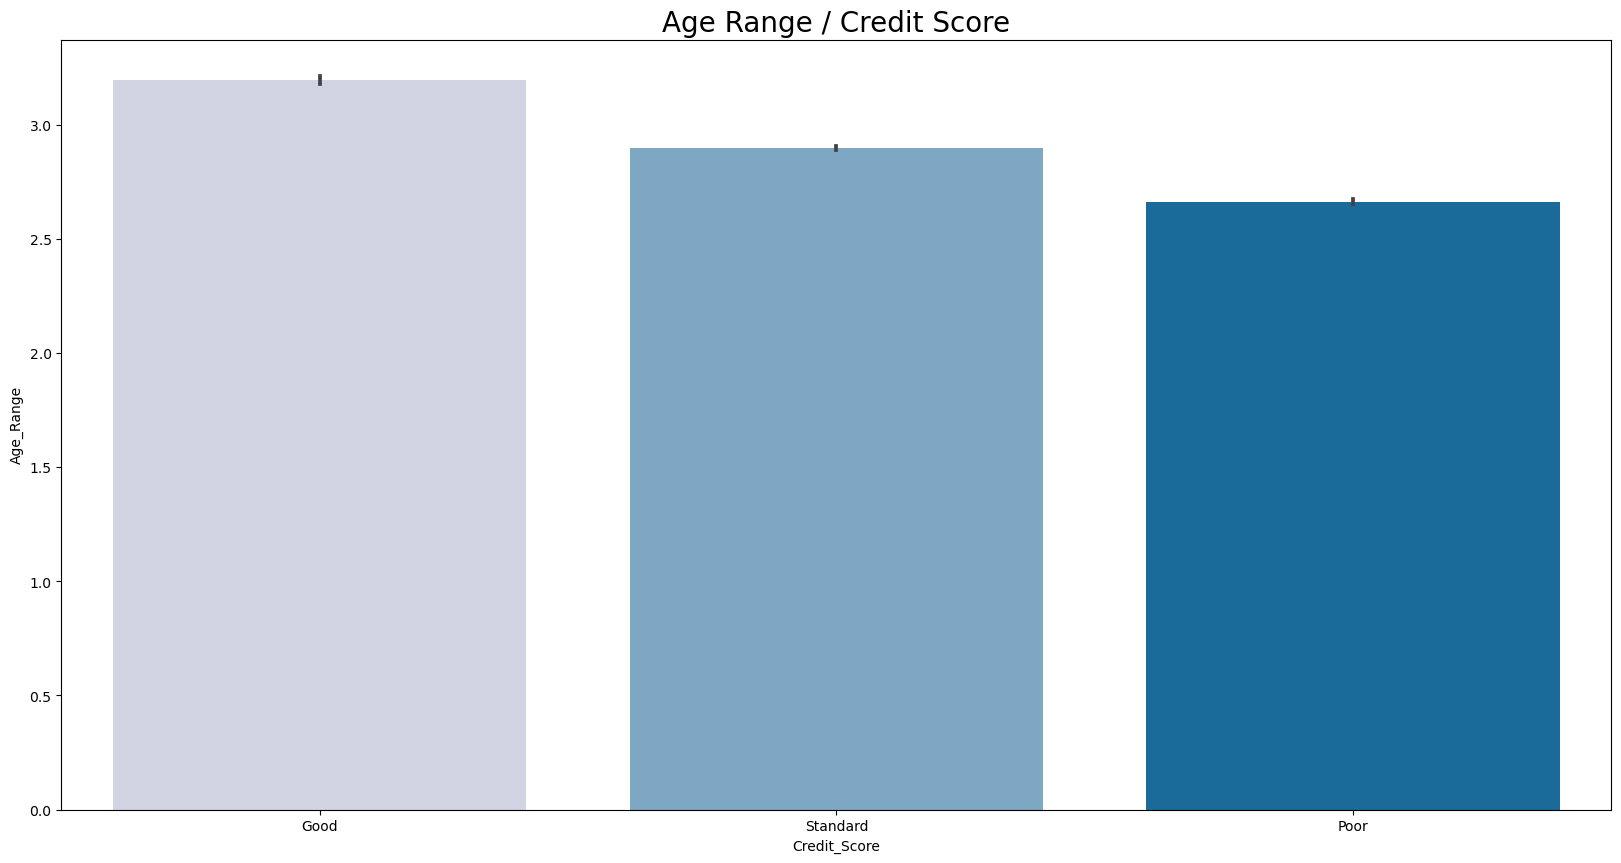

In [ ]:
#we can't use this figure 
plt.figure(figsize=(20,10))
sns.barplot(x="Credit_Score", y="Age_Range", data=data, palette="PuBu")
plt.title("Age Range / Credit Score", fontsize=20)
plt.show()

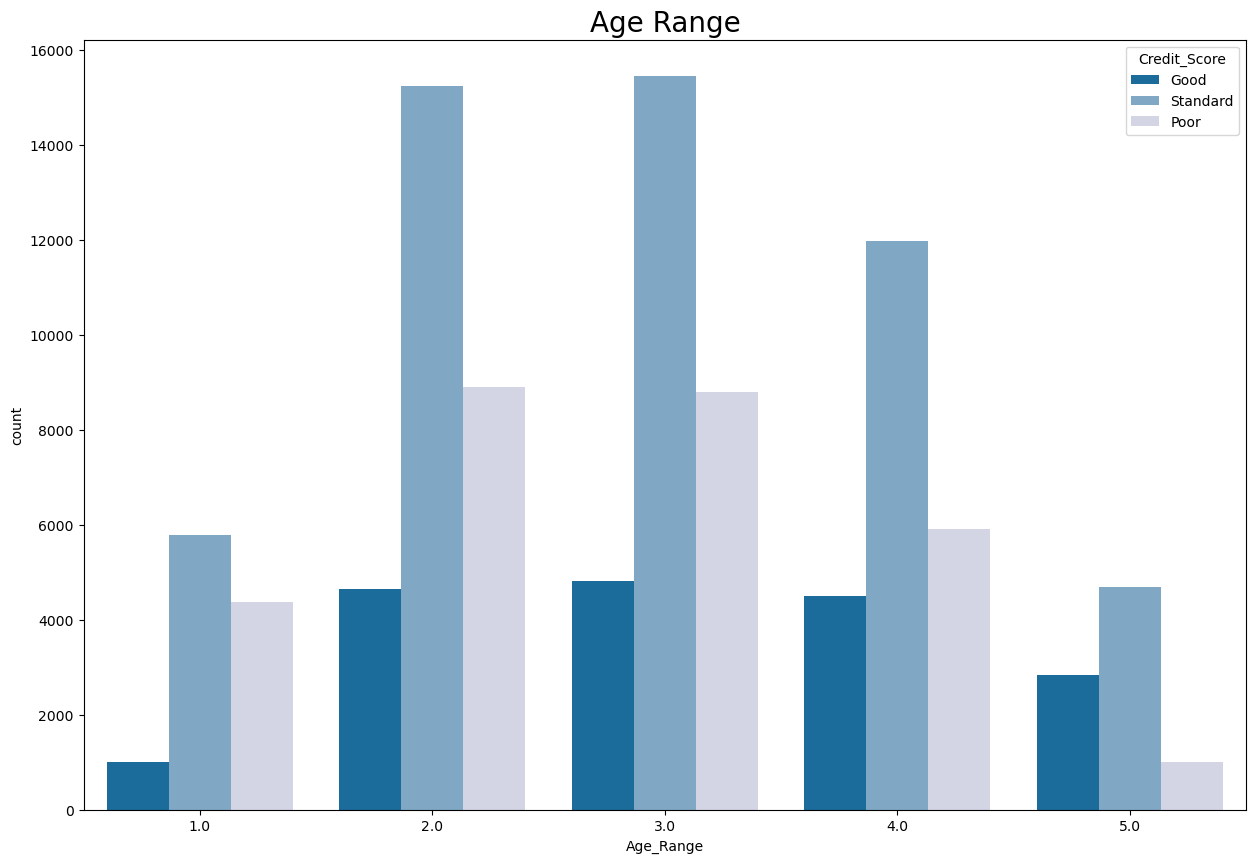

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x="Age_Range", hue="Credit_Score", data=data, palette="PuBu_r")
plt.title("Age Range", fontsize=20)
plt.show()

In [ ]:
#1. The order according to the number of people is 20s, 30s, 40s, 10s, and 50s.
#2. The order according to the Credit Score is 50s, 40s, 30s, 20s, 10s.
#3. Credit score of most of people is Standard.
#4. There is no big difference between the number of people who got Good credit score in 20s, 30s, 40s.

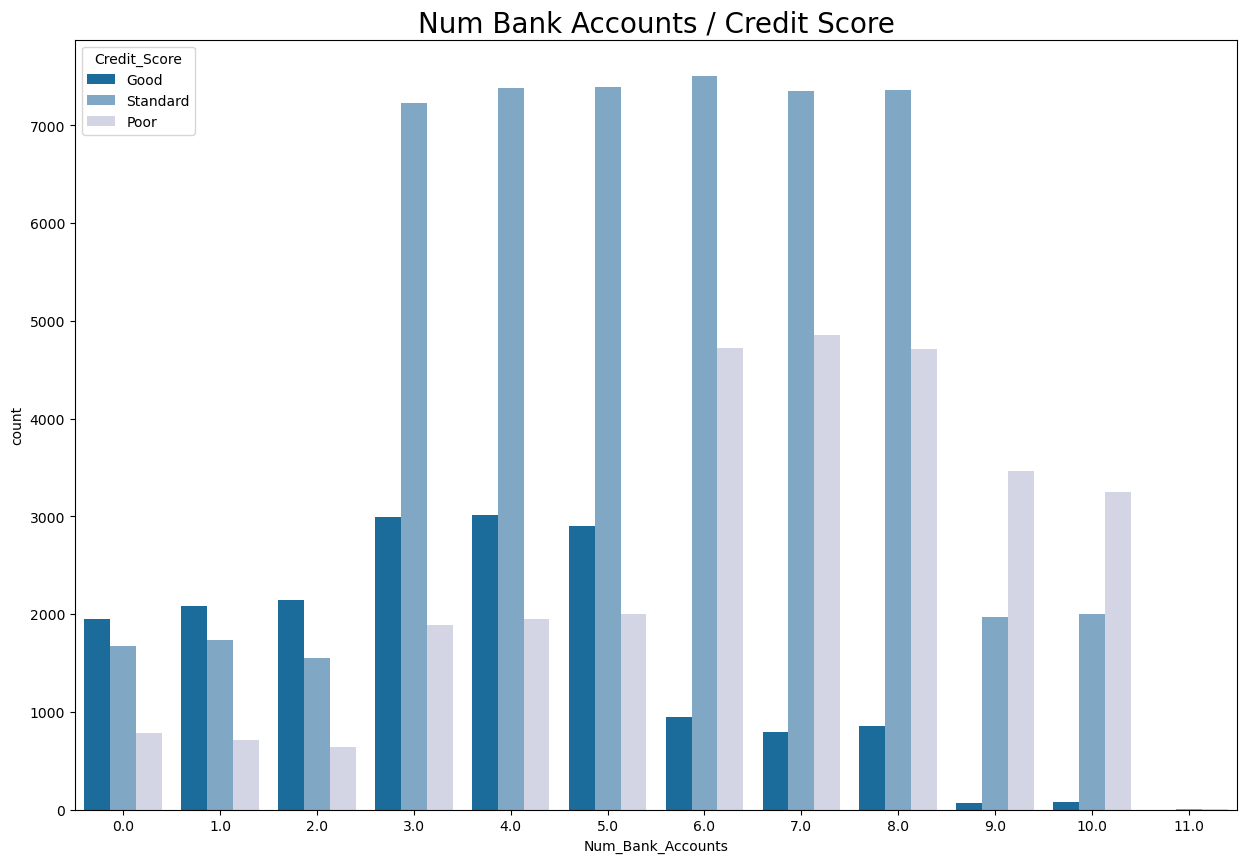

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x="Num_Bank_Accounts", hue="Credit_Score", data=data, palette="PuBu_r")
plt.title("Num Bank Accounts / Credit Score", fontsize=20)
plt.show()

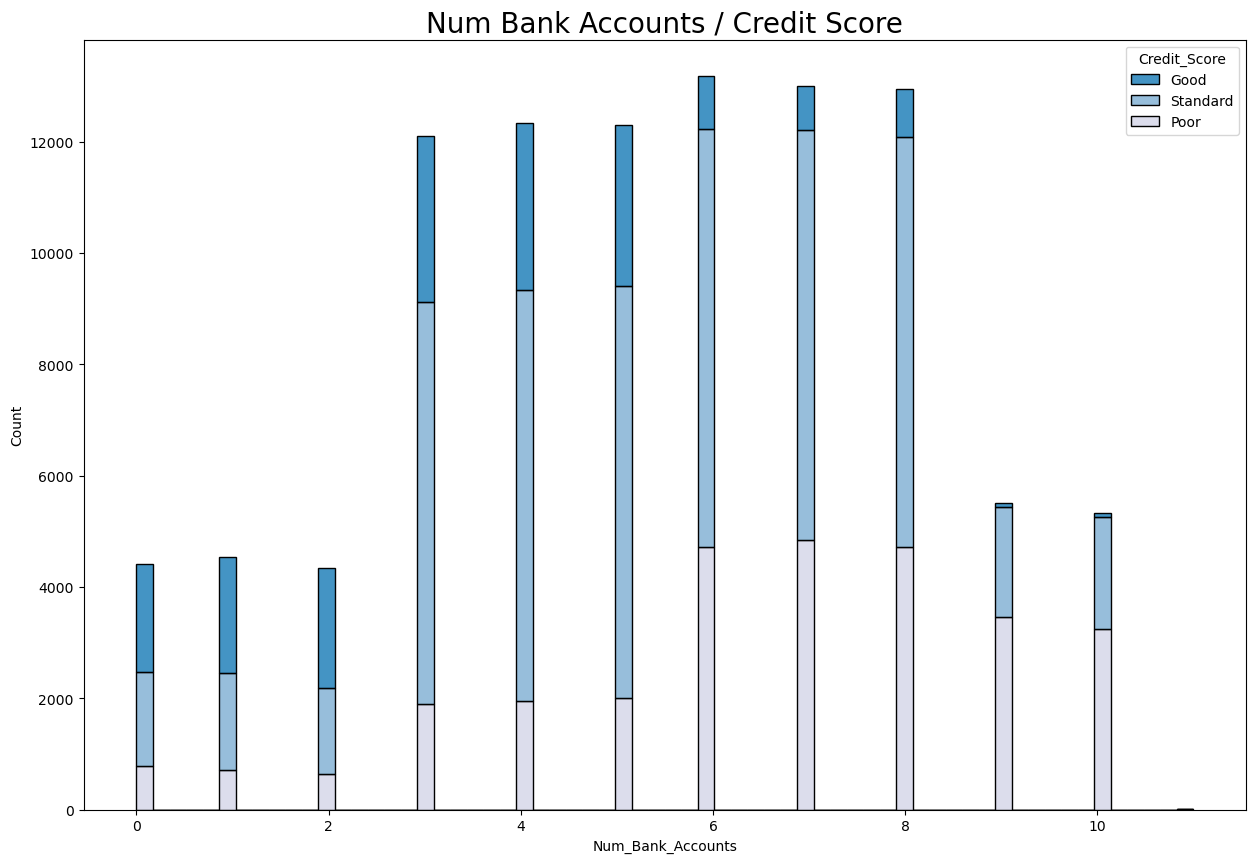

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(x="Num_Bank_Accounts", hue="Credit_Score", data=data, palette="PuBu_r",multiple="stack")
plt.title("Num Bank Accounts / Credit Score", fontsize=20)
plt.show()

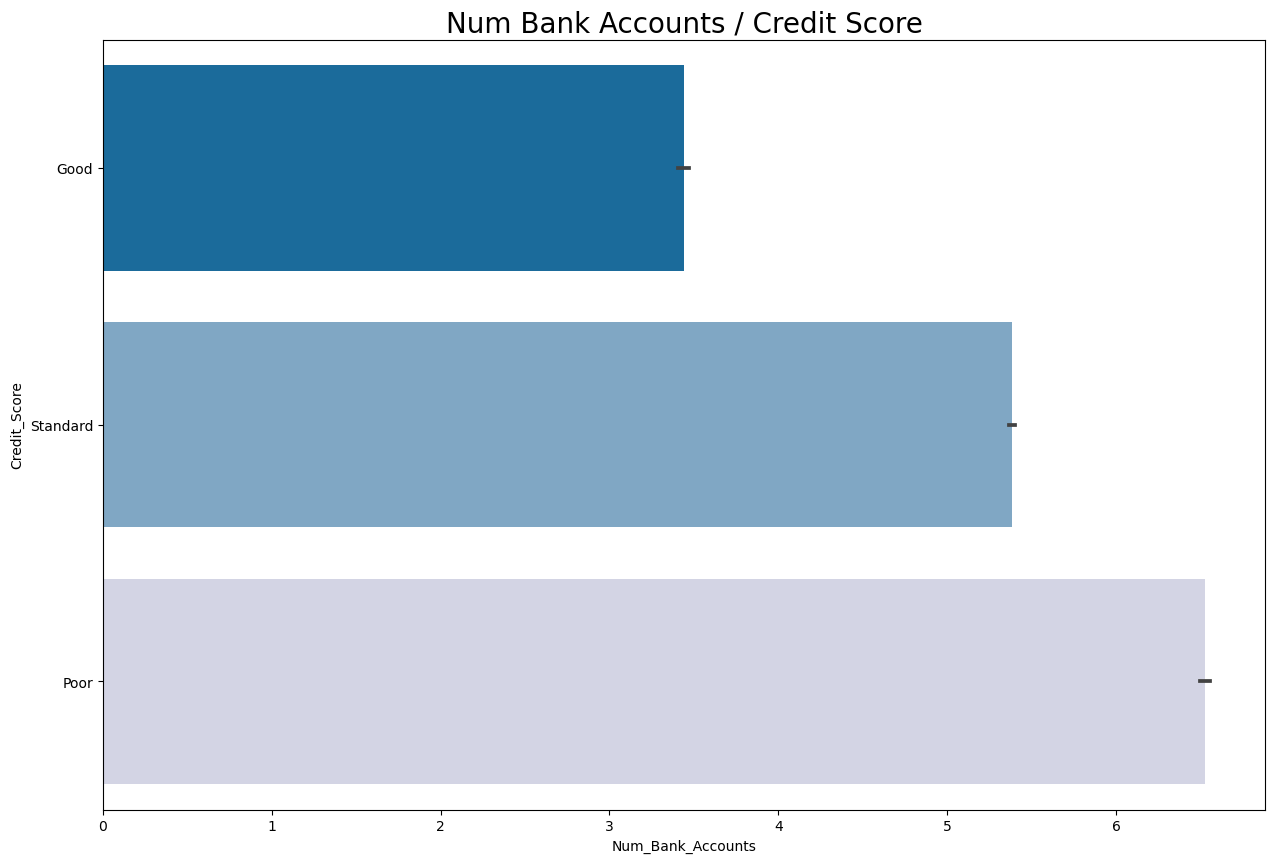

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x="Num_Bank_Accounts", y="Credit_Score", data=data, palette="PuBu_r")
plt.title("Num Bank Accounts / Credit Score", fontsize=20)
plt.show()

In [ ]:
#1. As the number of bank accounts increases, the credit score decreases.
#2. The shape of the falling graph is closer to the shape of the staircase than to the straight line.

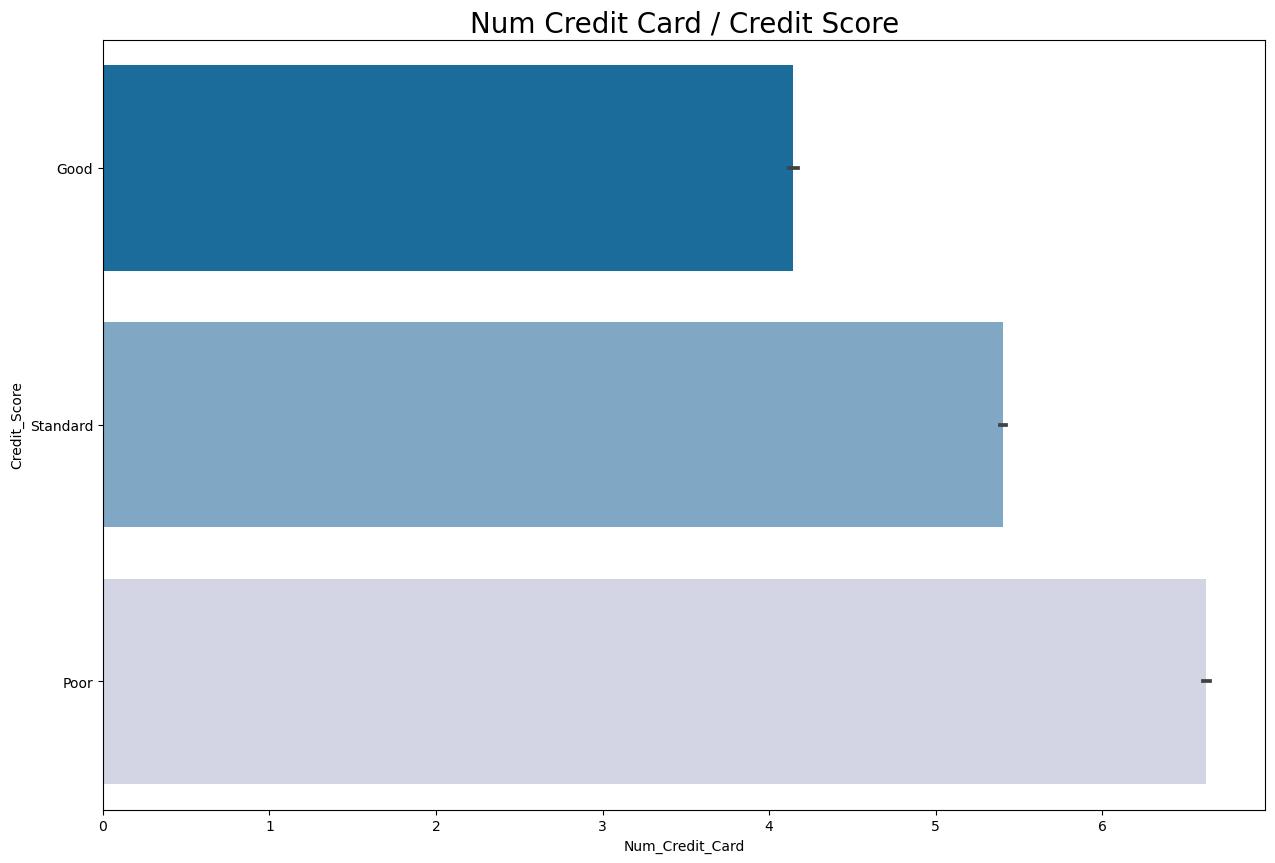

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x="Num_Credit_Card", y="Credit_Score", data=data, palette="PuBu_r")
plt.title("Num Credit Card / Credit Score", fontsize=20)
plt.show()

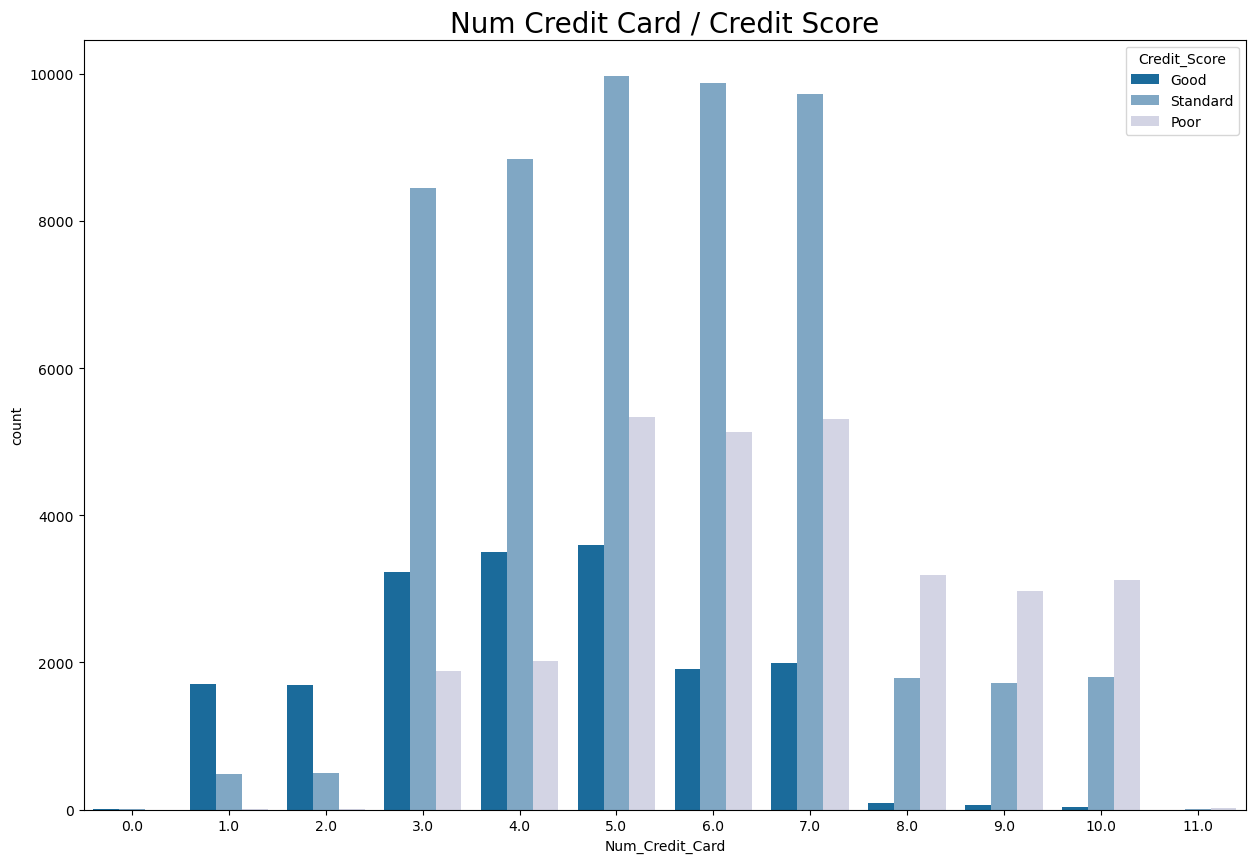

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x="Num_Credit_Card", hue="Credit_Score", data=data, palette="PuBu_r")
plt.title("Num Credit Card / Credit Score", fontsize=20)
plt.show()

In [ ]:
#1. As the number of credit cards increases, the credit score decreases.
#2. When the number of credit cards is 2-3 or 7-8, the credit score drops significantly.

**ok so this figure it doesn't work good with us as you can see interest rate here is float when in our dataset it's int**

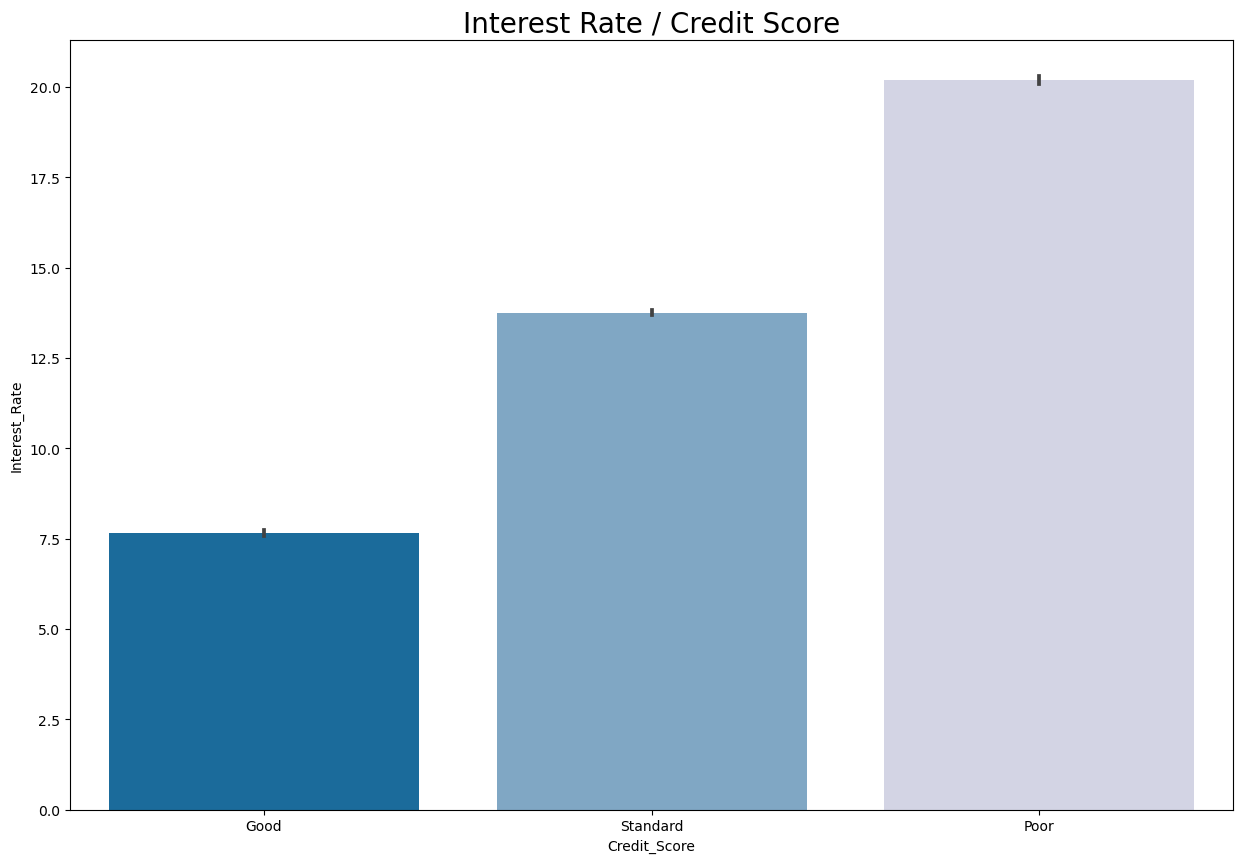

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x="Credit_Score", y="Interest_Rate", data=data, palette="PuBu_r")
plt.title("Interest Rate / Credit Score", fontsize=20)
plt.show()


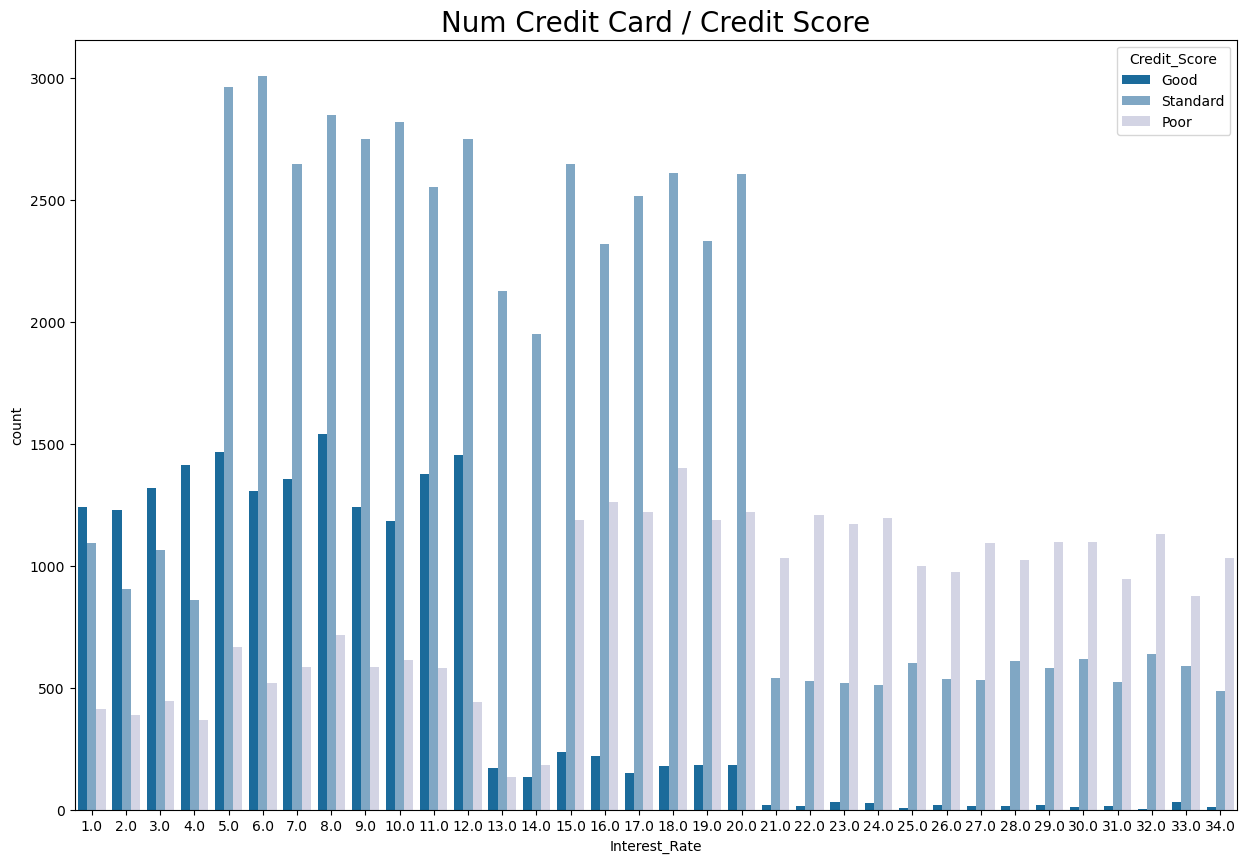

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x="Interest_Rate", hue="Credit_Score", data=data, palette="PuBu_r")
plt.title("Num Credit Card / Credit Score", fontsize=20)
plt.show()

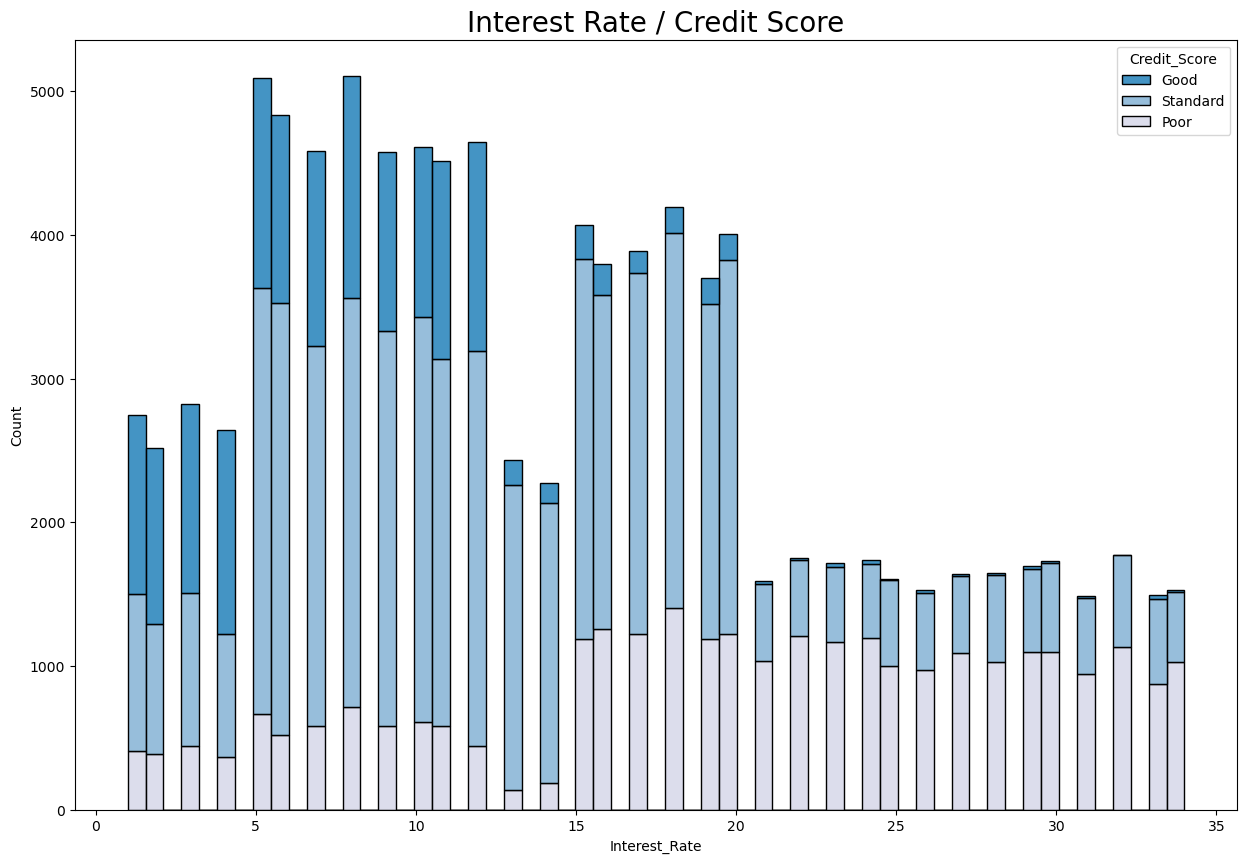

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(x="Interest_Rate", hue="Credit_Score", data=data, palette="PuBu_r",multiple="stack")
plt.title("Interest Rate / Credit Score", fontsize=20)
plt.show()

In [ ]:
#1. When the interest rate is 8~9 and 20~21, the credit score decreases significantly.
#2. As Interest Rate increases, the credit score decreases.

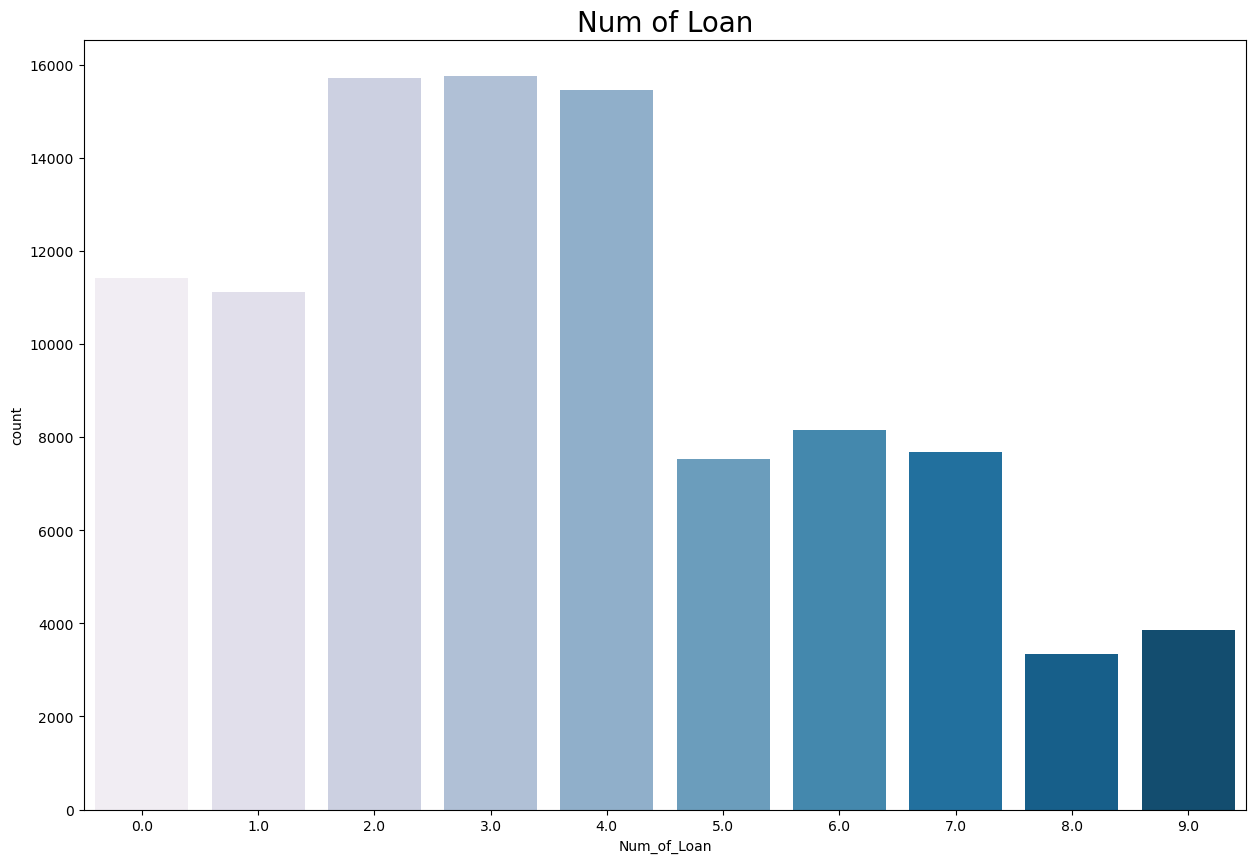

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x="Num_of_Loan", data=data, palette="PuBu")
plt.title("Num of Loan", fontsize=20)
plt.show()

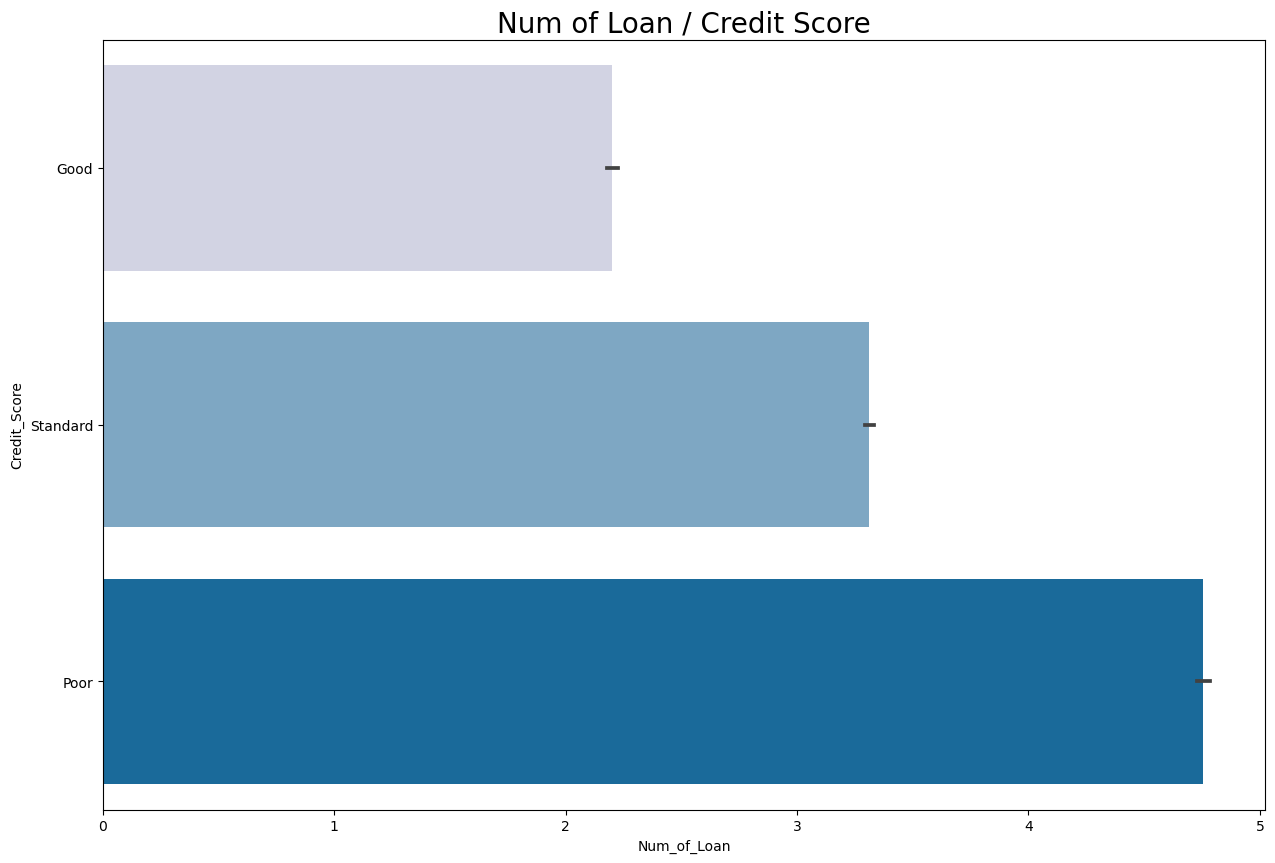

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x="Num_of_Loan", y="Credit_Score", data=data, palette="PuBu")
plt.title("Num of Loan / Credit Score", fontsize=20)
plt.show()

In [ ]:
#1. As the number of loans increases, the credit score decreases.
#2. The number of people who took out loans is the highest in number 2, 3, and 4. And you can see that there are even people who received numbers 8 and 9.
#3. It can be seen that the credit score is falling sharply from the number of loans taken from 1 to 2, 4 to 5. In particular, a really significant decline can be seen in 4 to 5

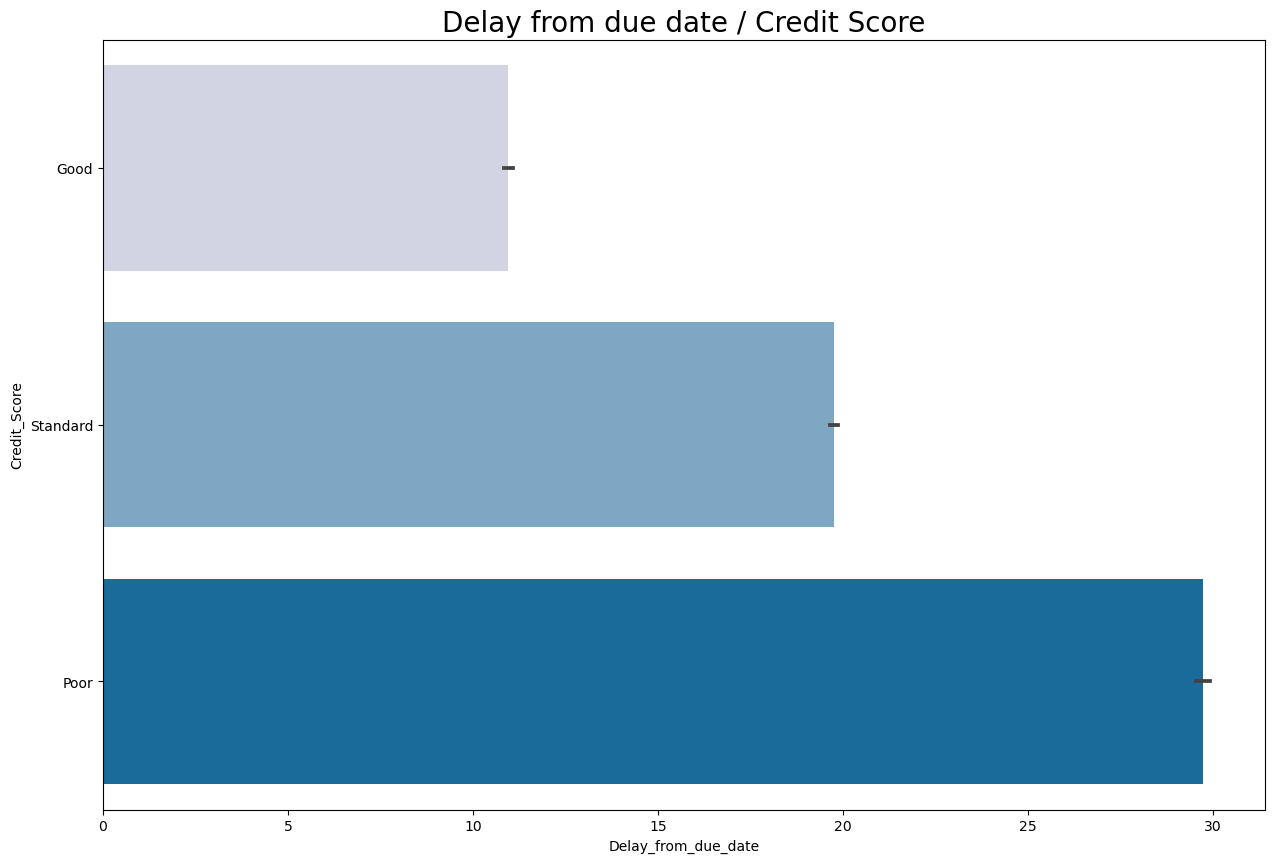

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x="Delay_from_due_date", y="Credit_Score", data=data, palette="PuBu")
plt.title("Delay from due date / Credit Score", fontsize=20)
plt.show()

In [ ]:
#1. As delay from due date increases, the credit score decreases.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


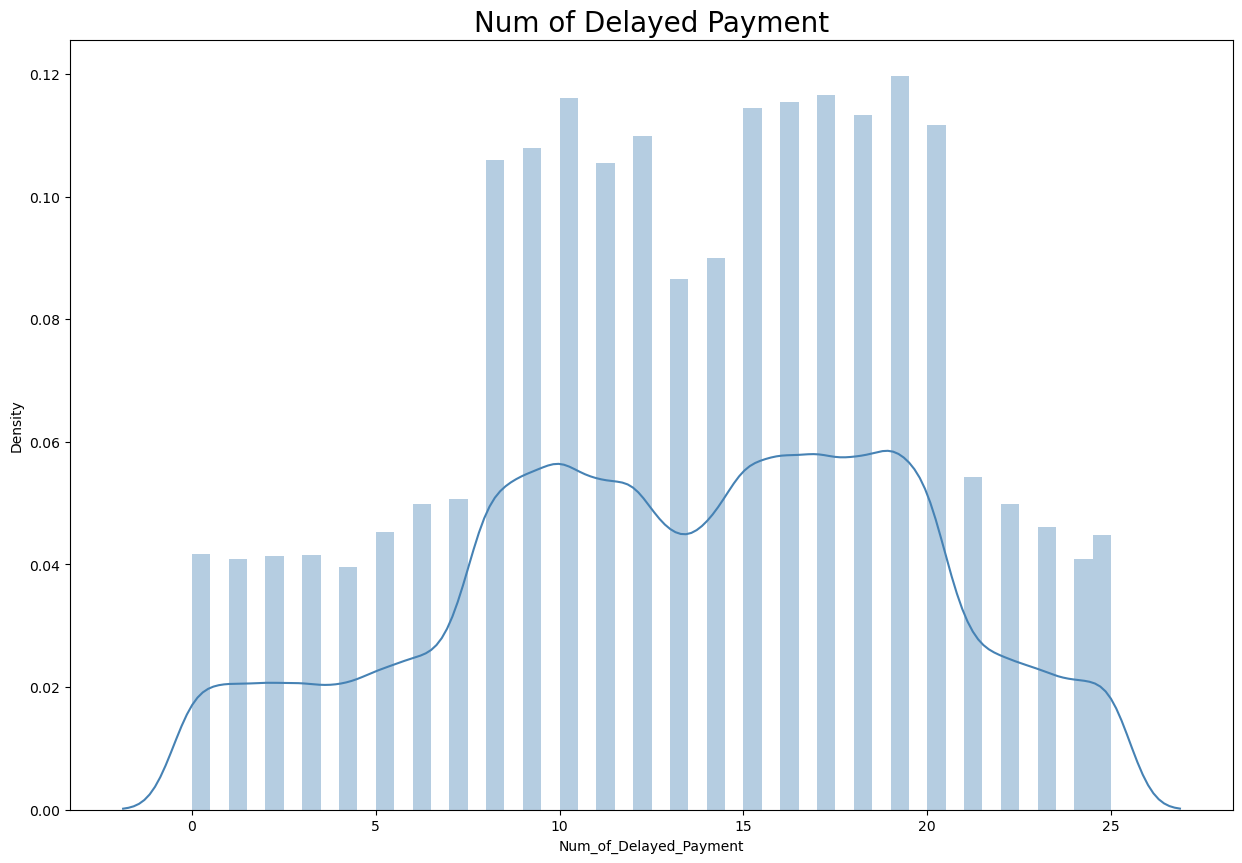

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(data["Num_of_Delayed_Payment"], color="SteelBlue")
plt.title("Num of Delayed Payment", fontsize=20)
plt.show()

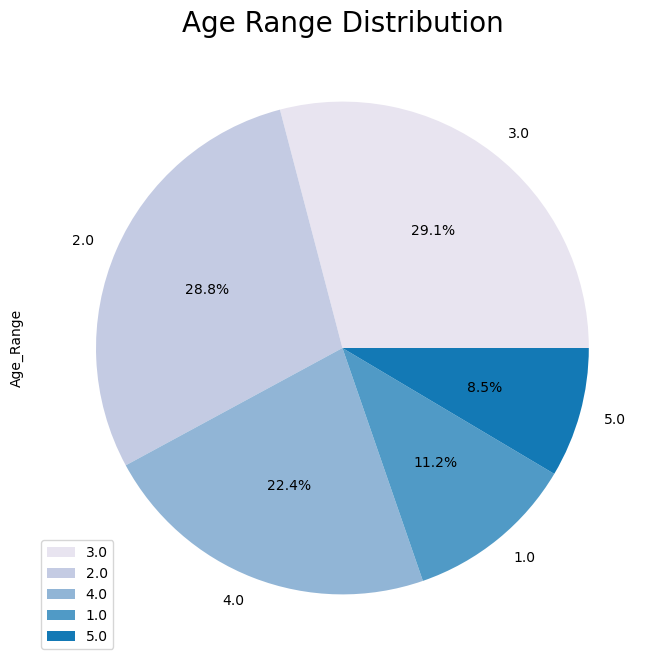

In [ ]:
plt.figure(figsize=(8,8))
data['Age_Range'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('PuBu'))
plt.title('Age Range Distribution', fontsize=20)
plt.legend()
plt.show()


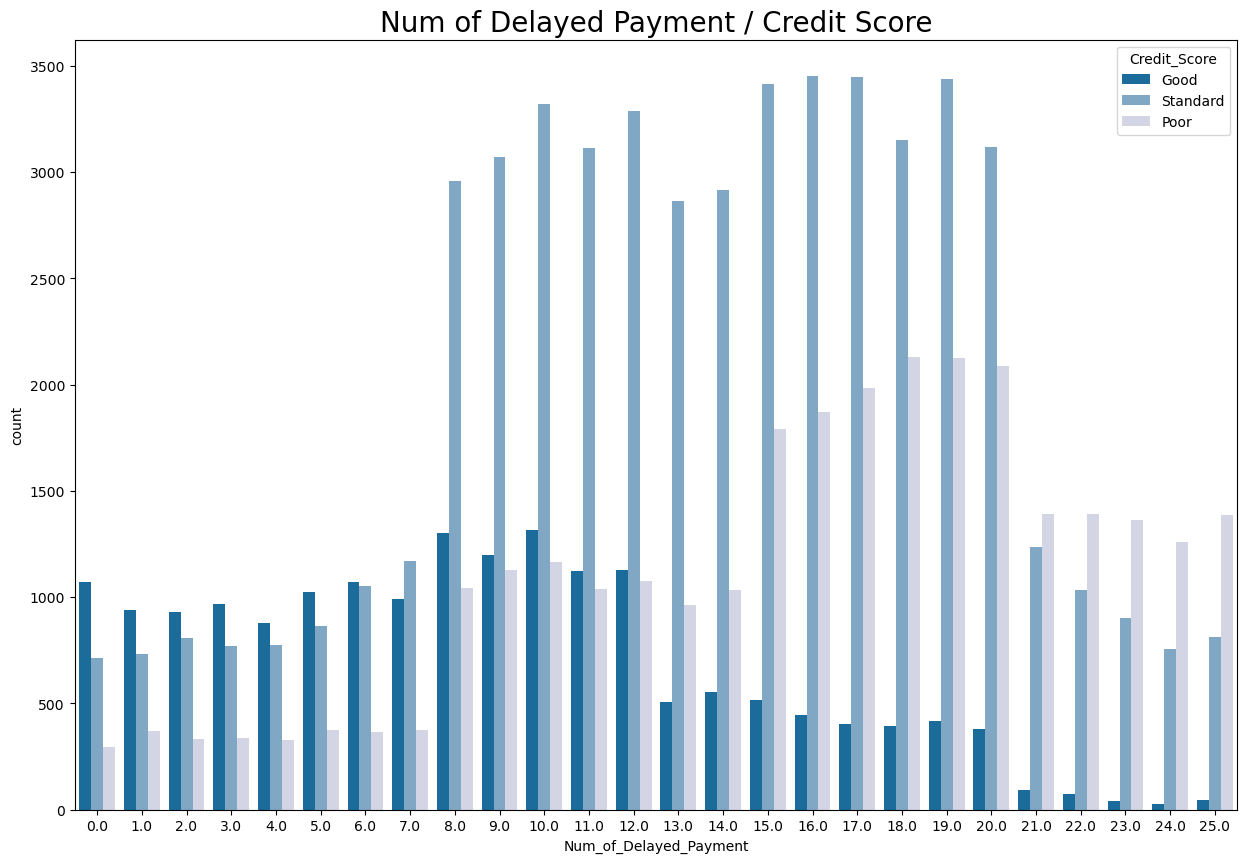

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x="Num_of_Delayed_Payment", hue="Credit_Score", data=data, palette="PuBu_r")
plt.title("Num of Delayed Payment / Credit Score", fontsize=20)
plt.show()

In [ ]:
#1. Most people have yet to pay 8 to 20 kinds of money.
#2. The higher the number of overdue payments, the lower the credit score, which is almost straight.

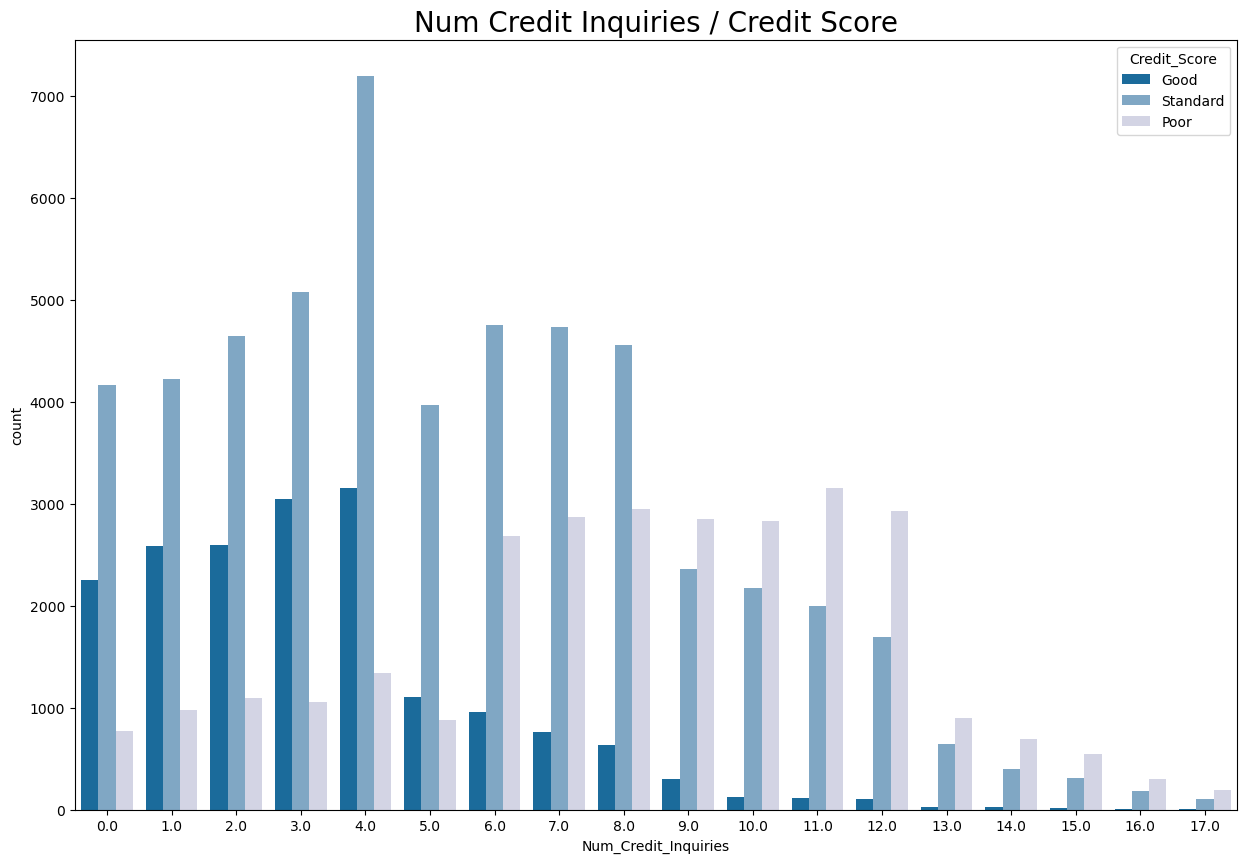

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x="Num_Credit_Inquiries", hue="Credit_Score", data=data, palette="PuBu_r")
plt.title("Num Credit Inquiries / Credit Score", fontsize=20)
plt.show()

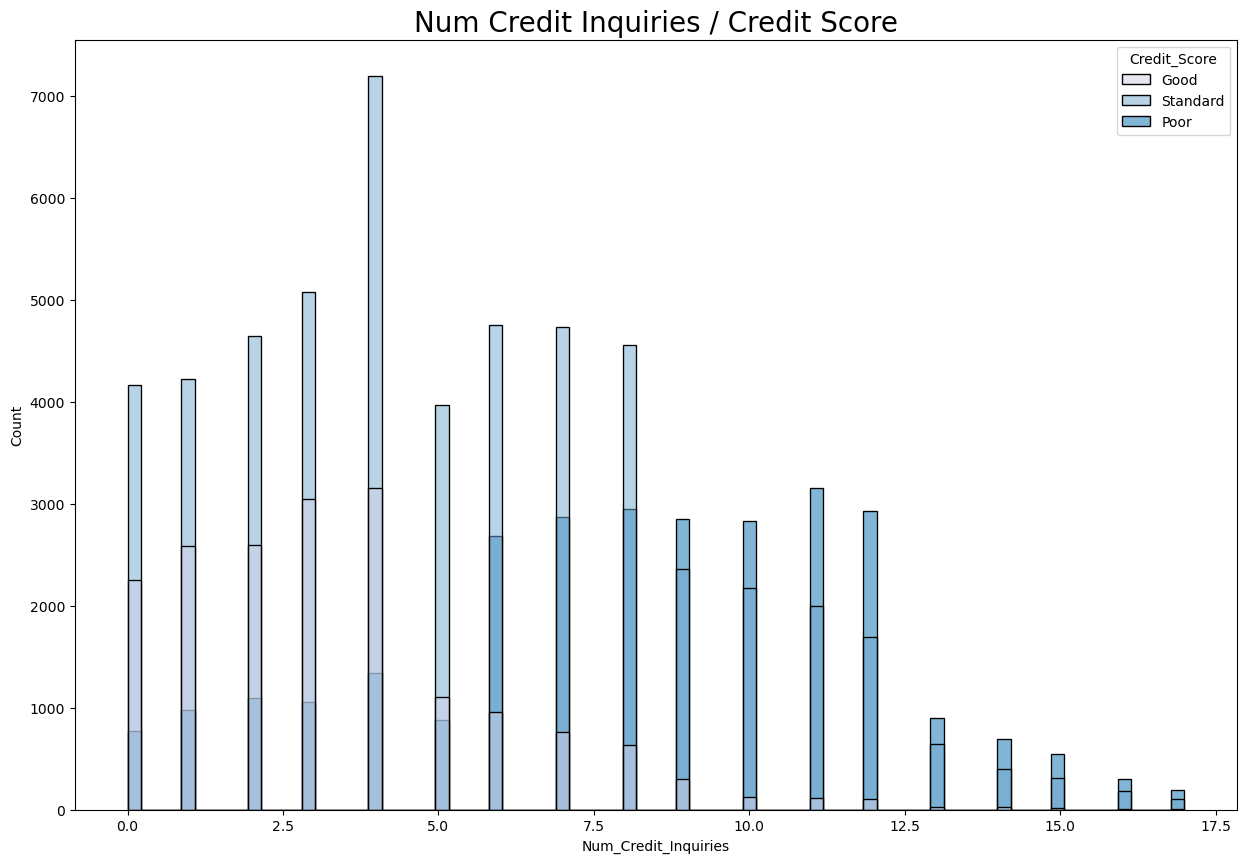

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(x="Num_Credit_Inquiries", hue="Credit_Score", data=data, palette="PuBu")
plt.title("Num Credit Inquiries / Credit Score", fontsize=20)
plt.show()

In [ ]:
#1. The more Num Credit Inquires increase, the lower the credit score.
#2. Num Credit Inquires shows a sharp drop in credit scores between 2 and 12.

In [ ]:
data["Credit_Mix"].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

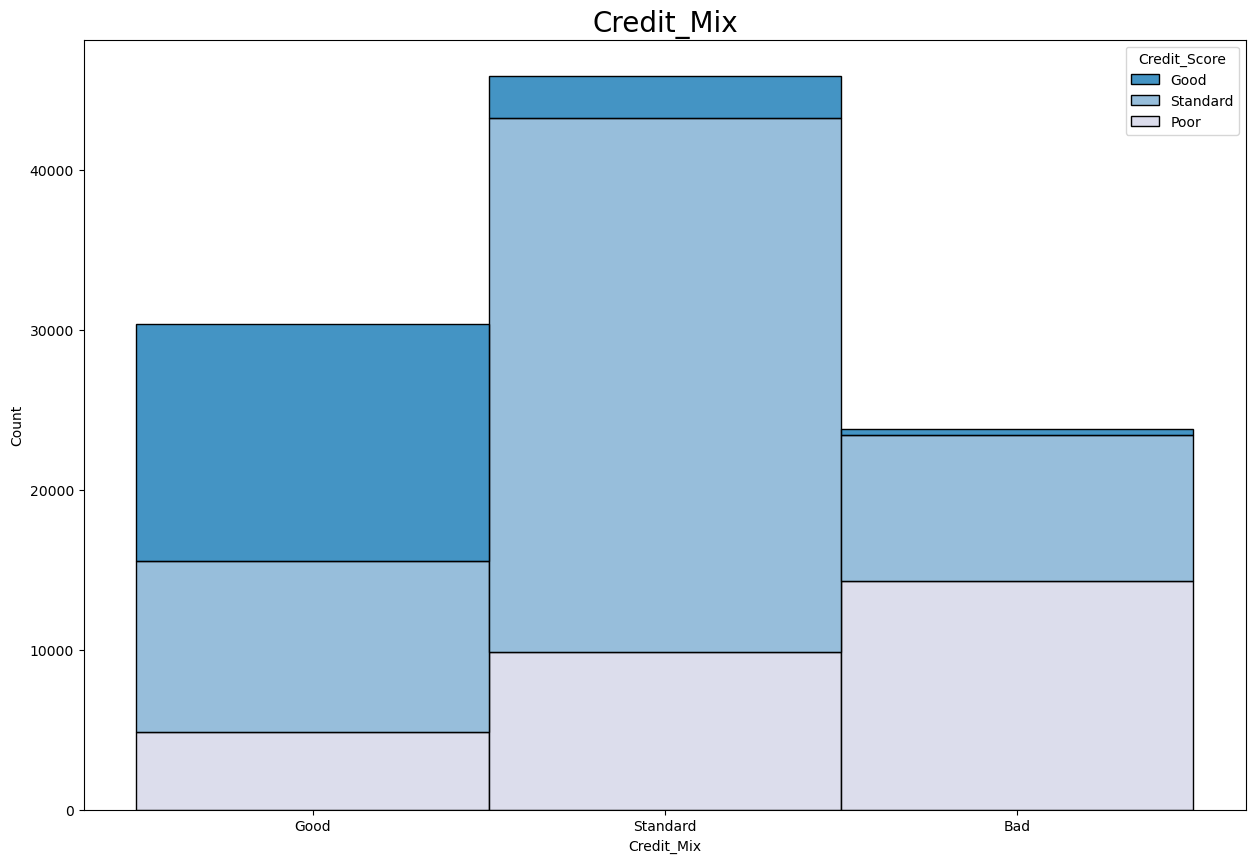

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(x="Credit_Mix", hue="Credit_Score", data=data, palette="PuBu_r", multiple="stack")
plt.title("Credit_Mix", fontsize=20)
plt.show()

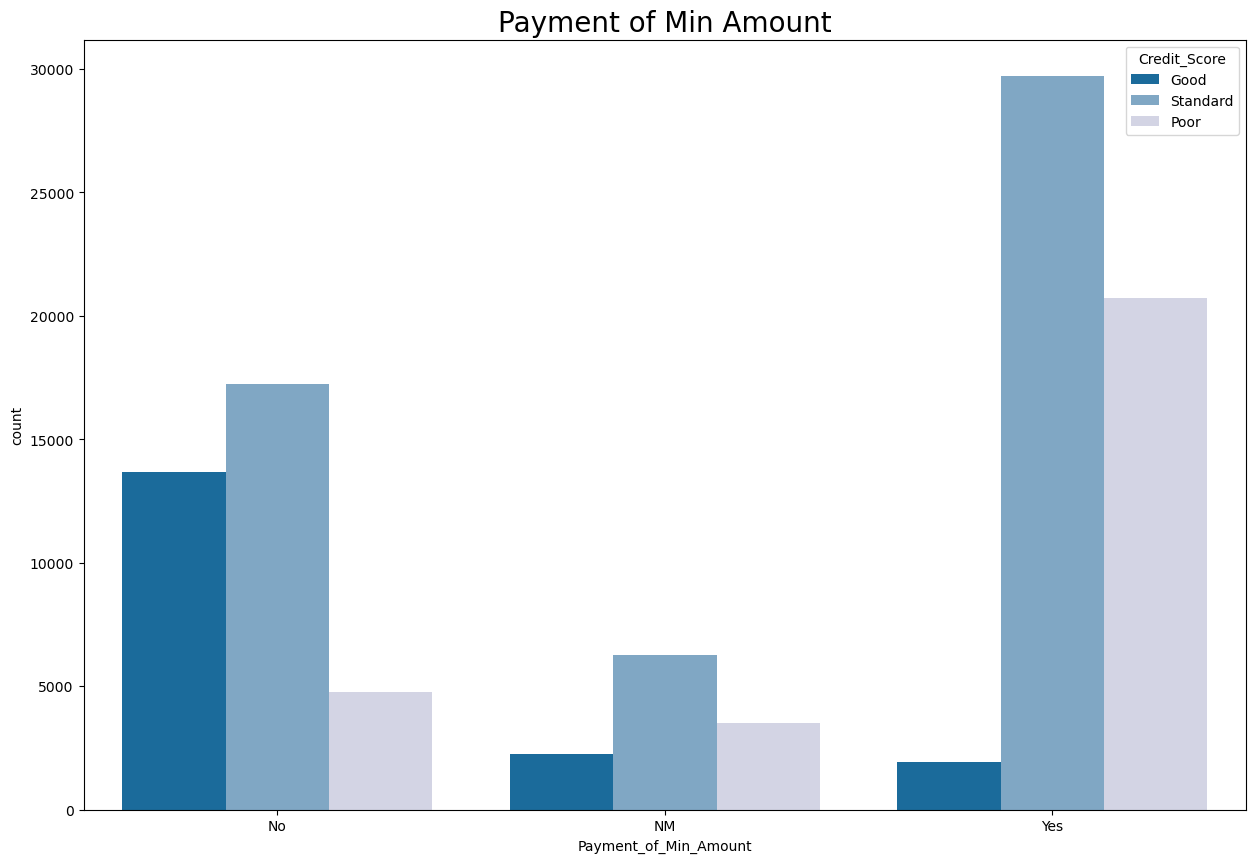

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x="Payment_of_Min_Amount", hue="Credit_Score", data=data, palette="PuBu_r")
plt.title("Payment of Min Amount", fontsize=20)
plt.show()

In [ ]:
#1. Credit Mix, Payment of Min Amount, has a direct relationship with the credit score.

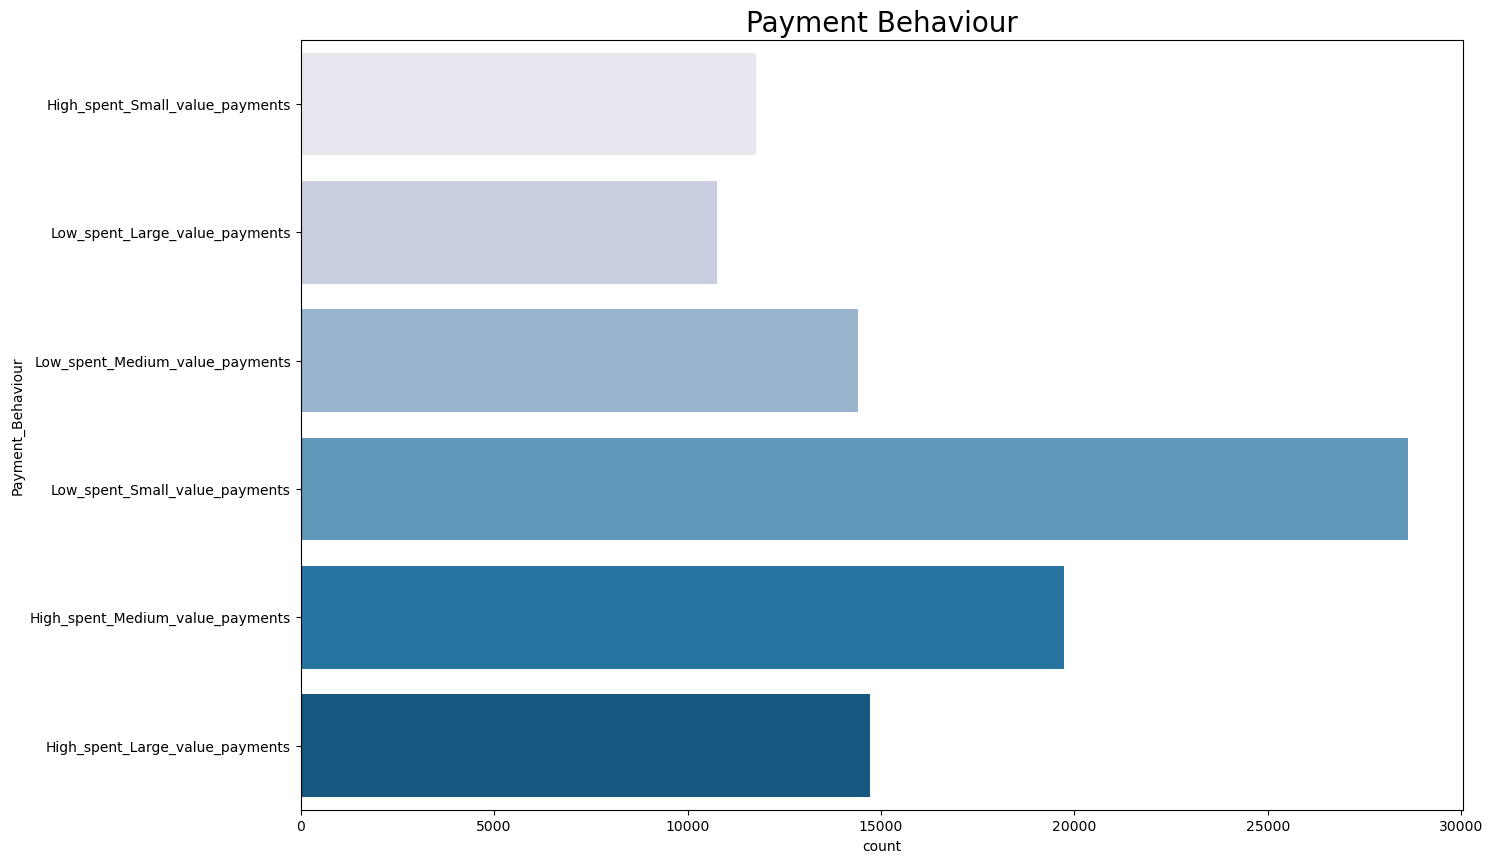

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(y="Payment_Behaviour", data=data, palette="PuBu")
plt.title("Payment Behaviour", fontsize=20)
plt.show()

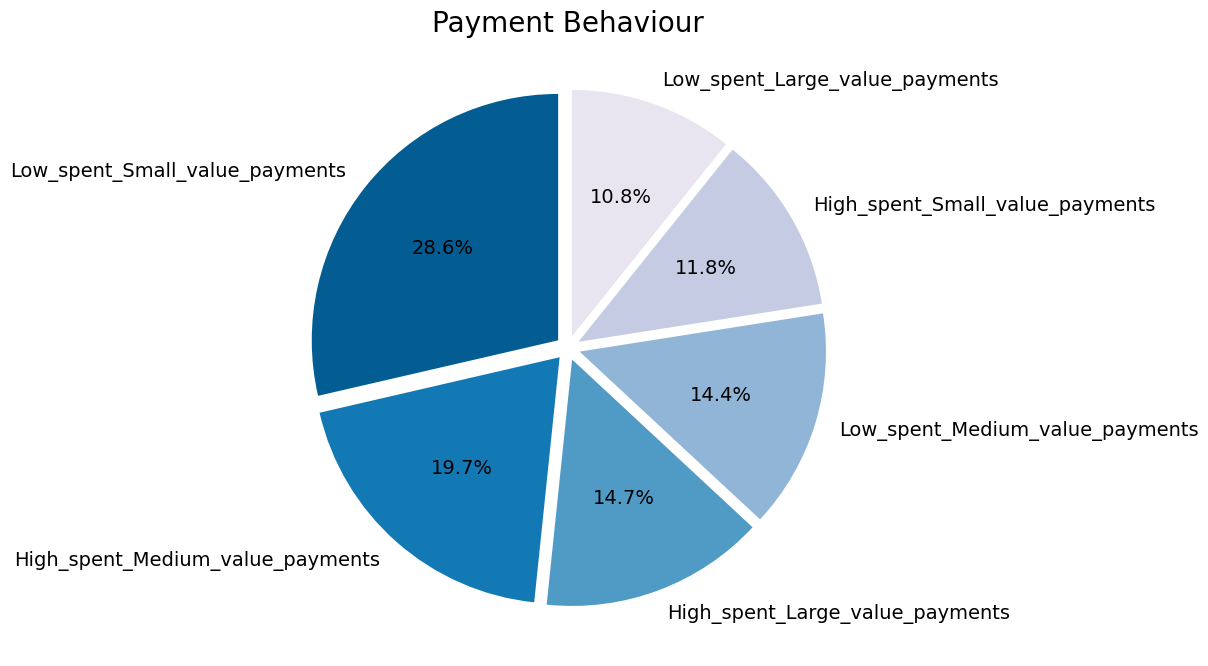

In [ ]:
counts = data['Payment_Behaviour'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, explode=[0.05] * len(counts), textprops={'fontsize': 14}, colors=sns.color_palette('PuBu_r')
)
plt.title("Payment Behaviour", fontsize=20)
plt.show()


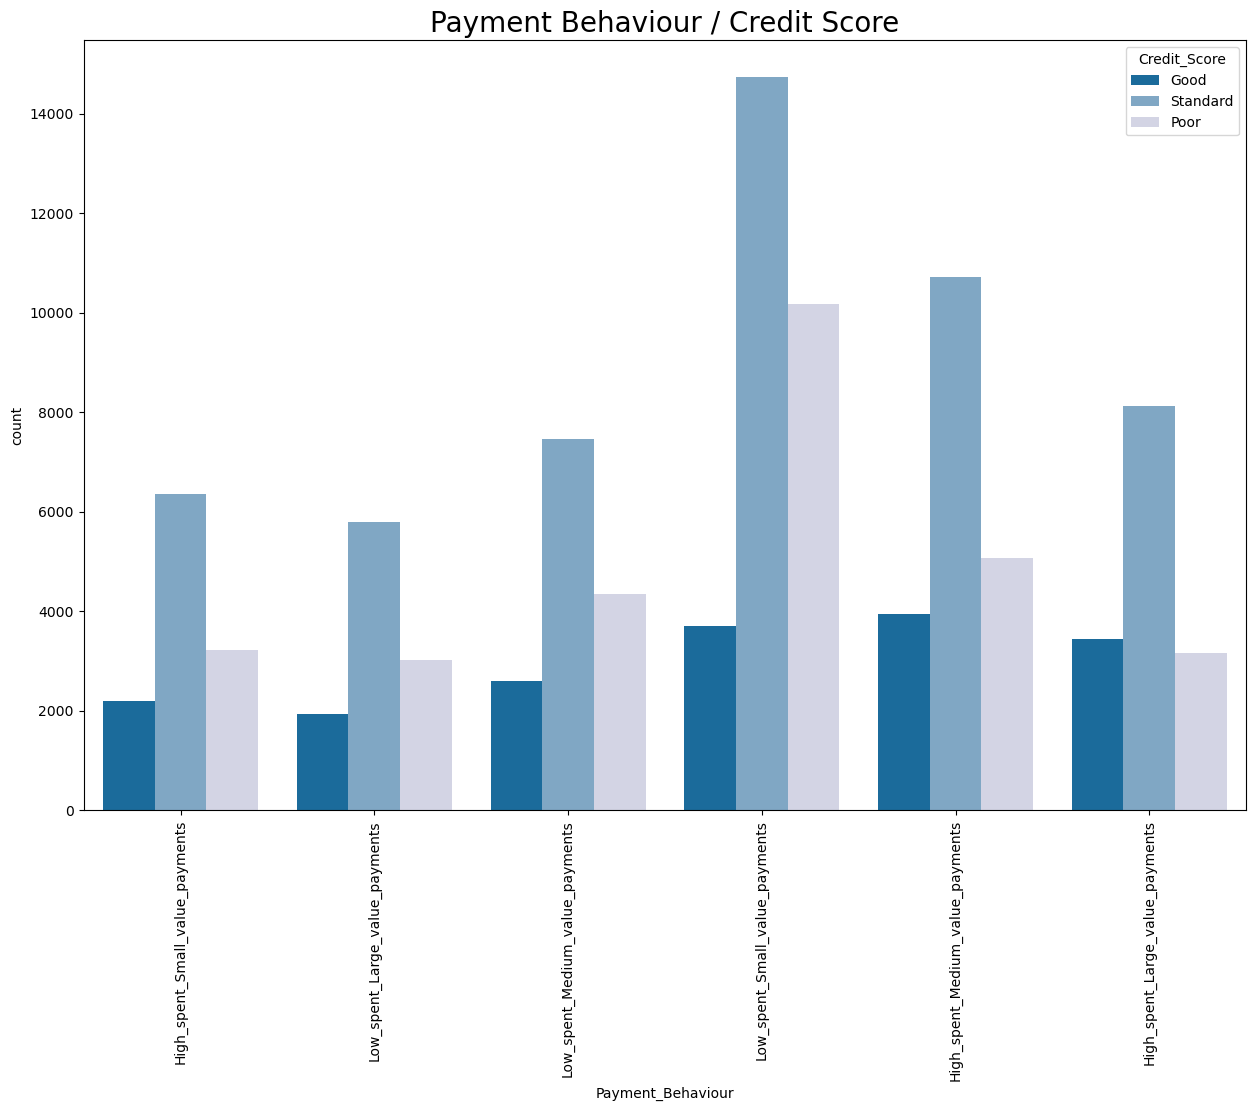

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x="Payment_Behaviour",hue="Credit_Score", data=data, palette="PuBu_r")
plt.xticks(rotation="vertical")
plt.title("Payment Behaviour / Credit Score", fontsize=20)
plt.show()

In [ ]:
#1. The number of people in the Low_spent_Medium_value_payments group is the highest. But their credit scores are the lowest.
#2. People in the High_spent_Large_value_payments group have the best credit scores.

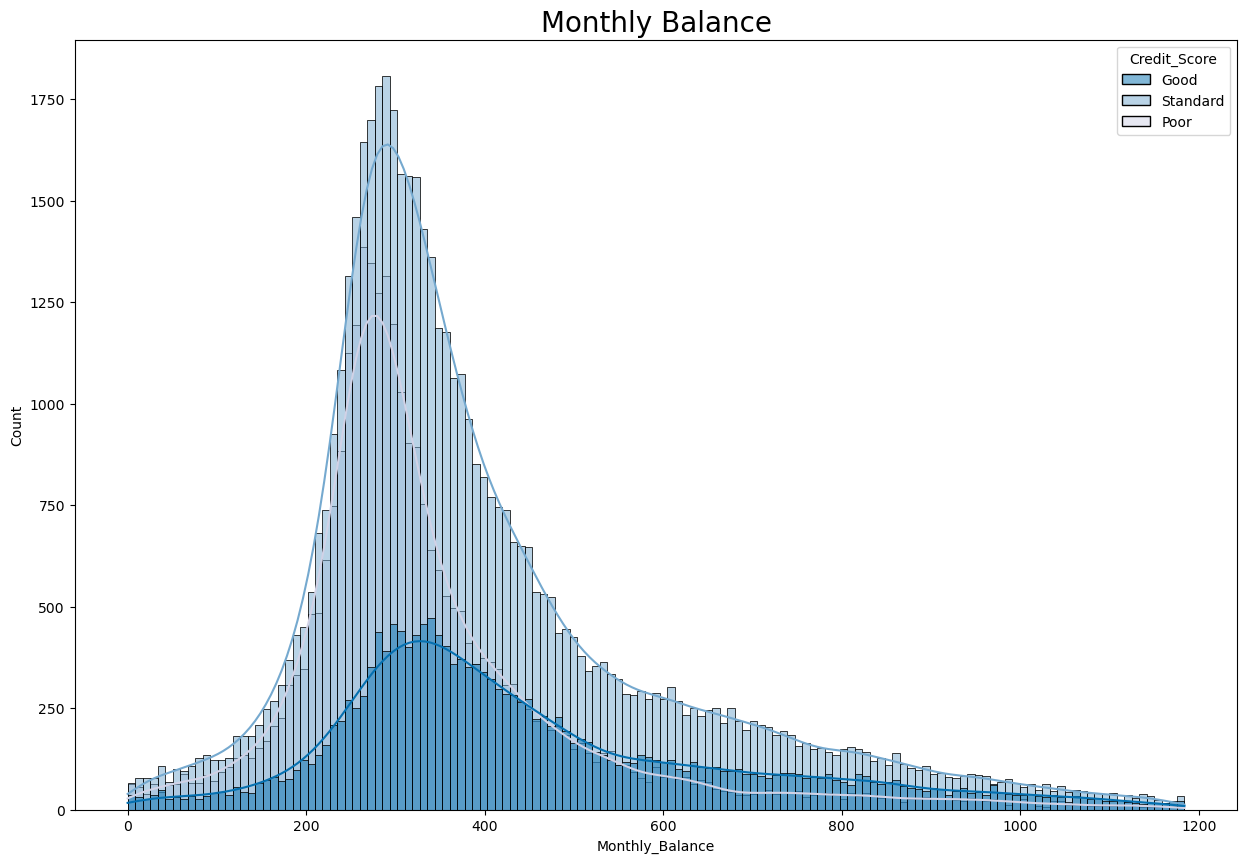

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(data=data, x="Monthly_Balance", kde = True, hue="Credit_Score", palette="PuBu_r", edgecolor="black")
plt.title("Monthly Balance", fontsize=20)
plt.show()

In [ ]:
#1. It can be seen that the monthly balance value of the largest number of people by credit score group is higher as the credit score is better.

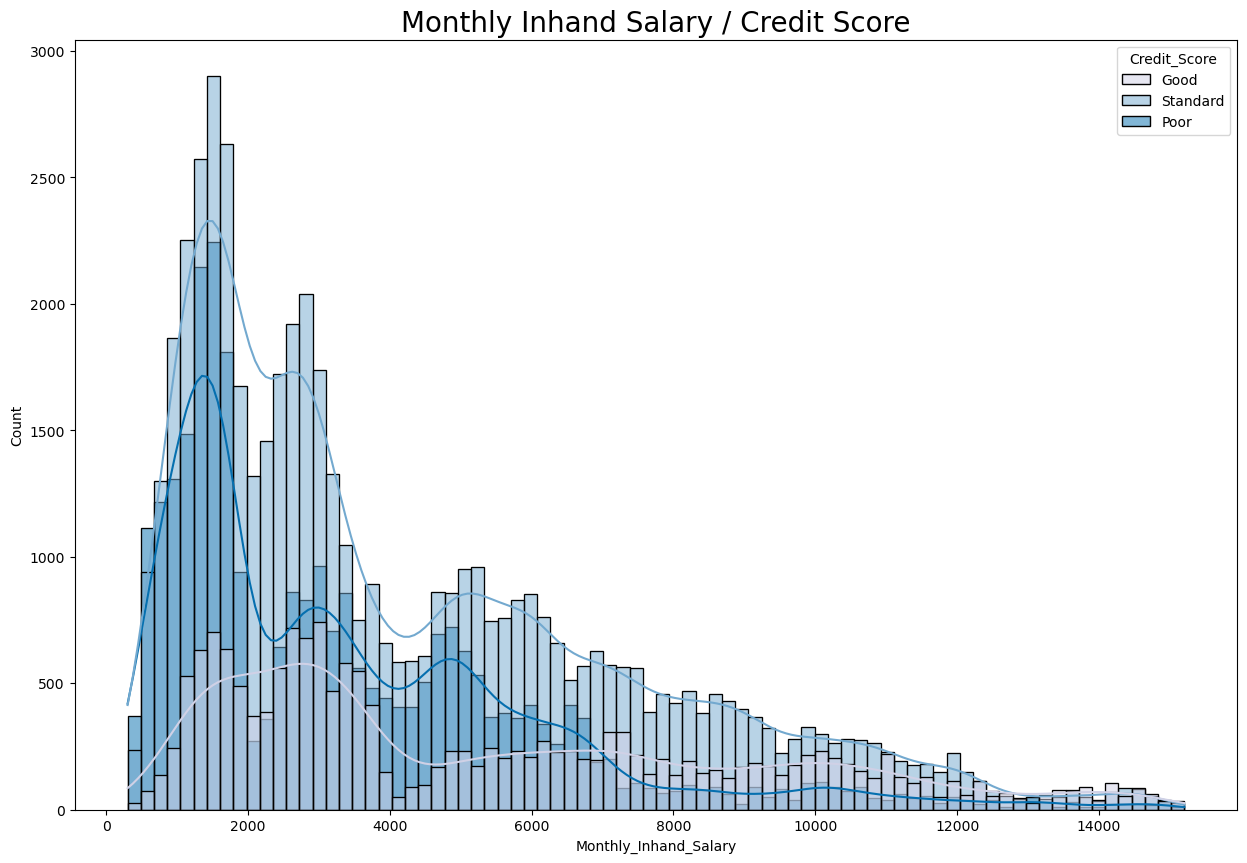

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(x="Monthly_Inhand_Salary", hue="Credit_Score", kde= True, data=data, palette="PuBu", edgecolor="black")
plt.title("Monthly Inhand Salary / Credit Score", fontsize=20)
plt.show()

In [ ]:
#1. People with good credit scores have a higher distribution of Monthly Inhand Salaries than people with Standard or Poor.

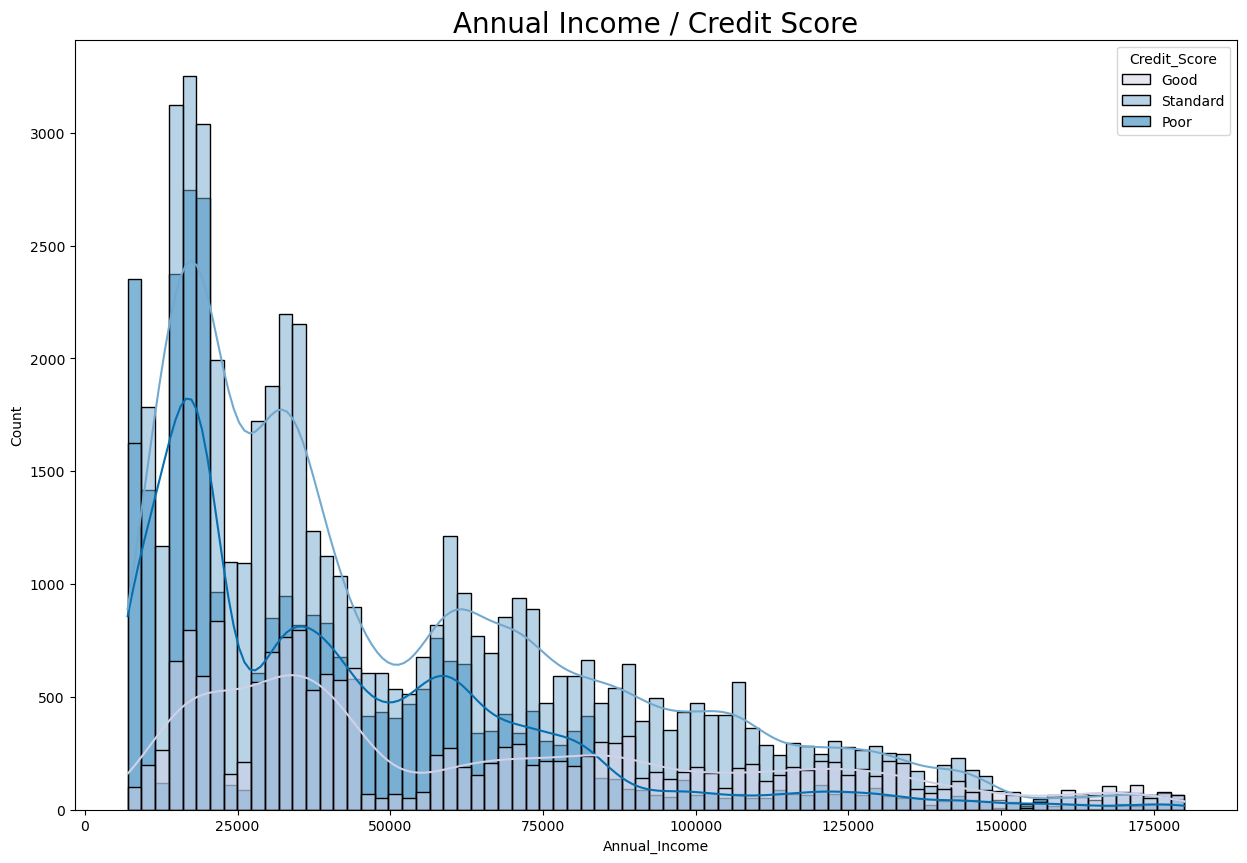

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(x="Annual_Income", hue="Credit_Score", kde= True, data=data, palette="PuBu", edgecolor="black")
plt.title("Annual Income / Credit Score", fontsize=20)
plt.show()

In [ ]:
#1. People with good credit scores have a higher distribution of Annual Income than people with Standard or Poor.
#2. If you look at the graph of Annual Income rather than the graph of Monthly Inhand Salary, you can see the difference between the three groups more clearly.

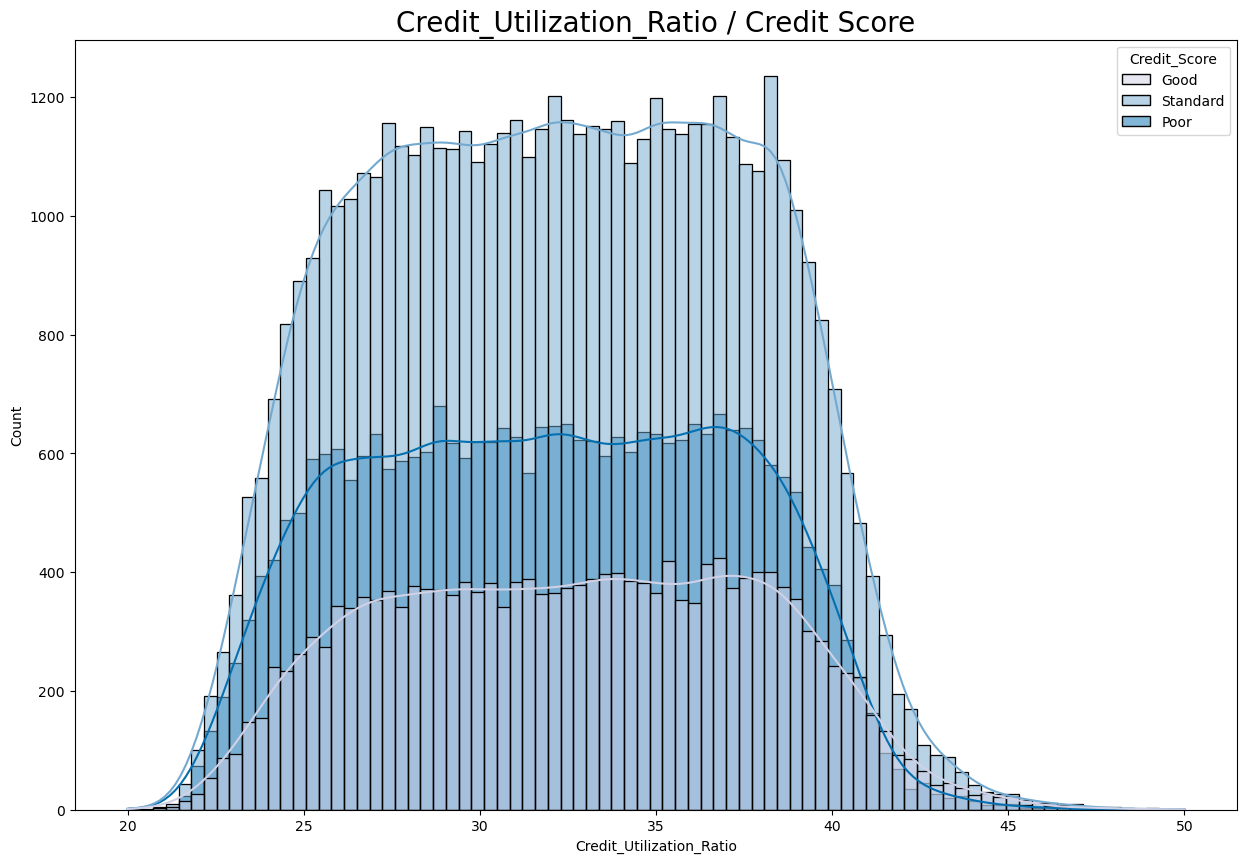

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(x="Credit_Utilization_Ratio", hue="Credit_Score", kde= True, data=data, palette="PuBu", edgecolor="black")
plt.title("Credit_Utilization_Ratio / Credit Score", fontsize=20)
plt.show()

In [ ]:
#1. There is only a difference in the number of people, but there is no big difference between the three groups.

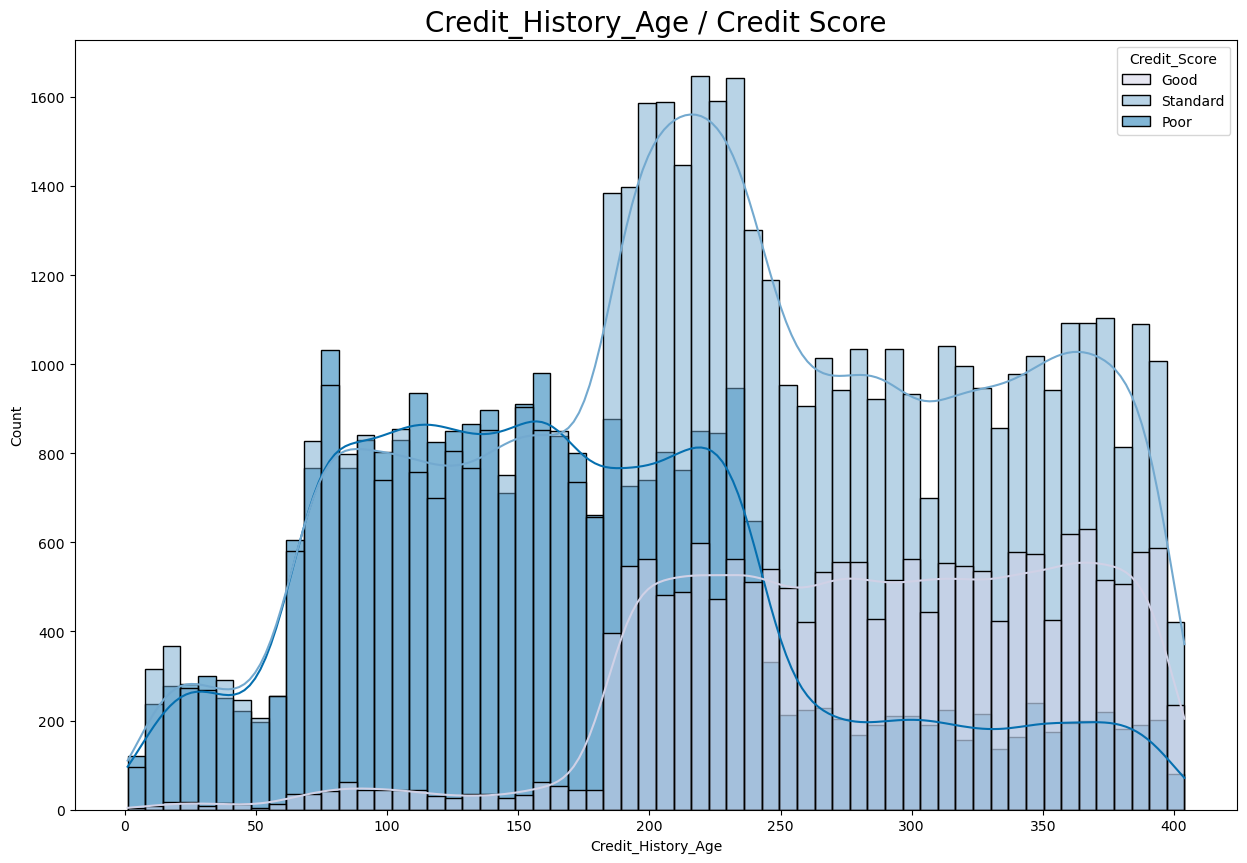

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(x="Credit_History_Age", hue="Credit_Score", kde= True, data=data, palette="PuBu", edgecolor="black")
plt.title("Credit_History_Age / Credit Score", fontsize=20)
plt.show()

In [ ]:
#1. People belonging to Poor are widely distributed on the side with low Credit History Age values.
#2. Those who belong to Standard have a higher Credit History Age value than those who belong to Poor. Most of the people who belong to Good are widely distributed at high prices.

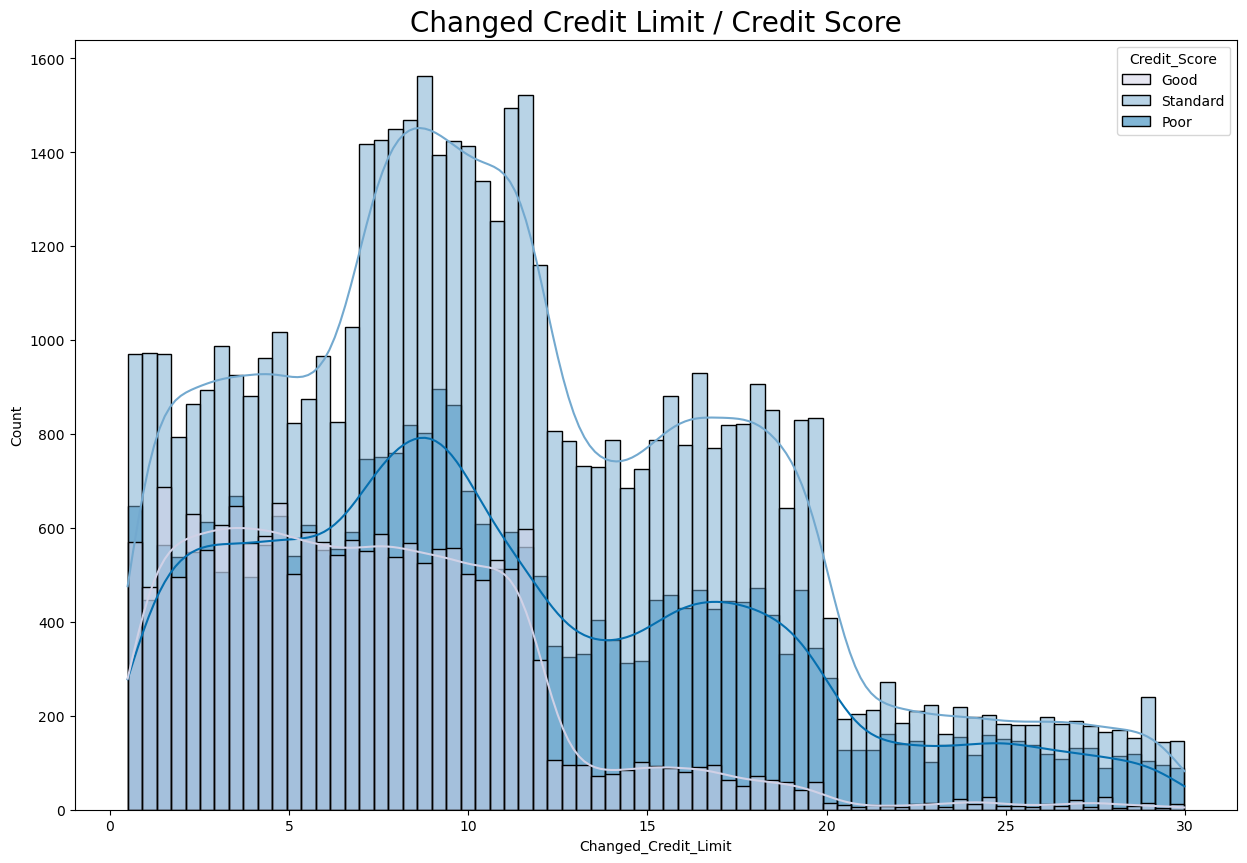

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(x="Changed_Credit_Limit", hue="Credit_Score", kde= True, data=data, palette="PuBu", edgecolor="black")
plt.title("Changed Credit Limit / Credit Score", fontsize=20)
plt.show()

In [ ]:
#1. Those with a Good Credit Score changed their Credit Limit less than those with Standard or Poor.

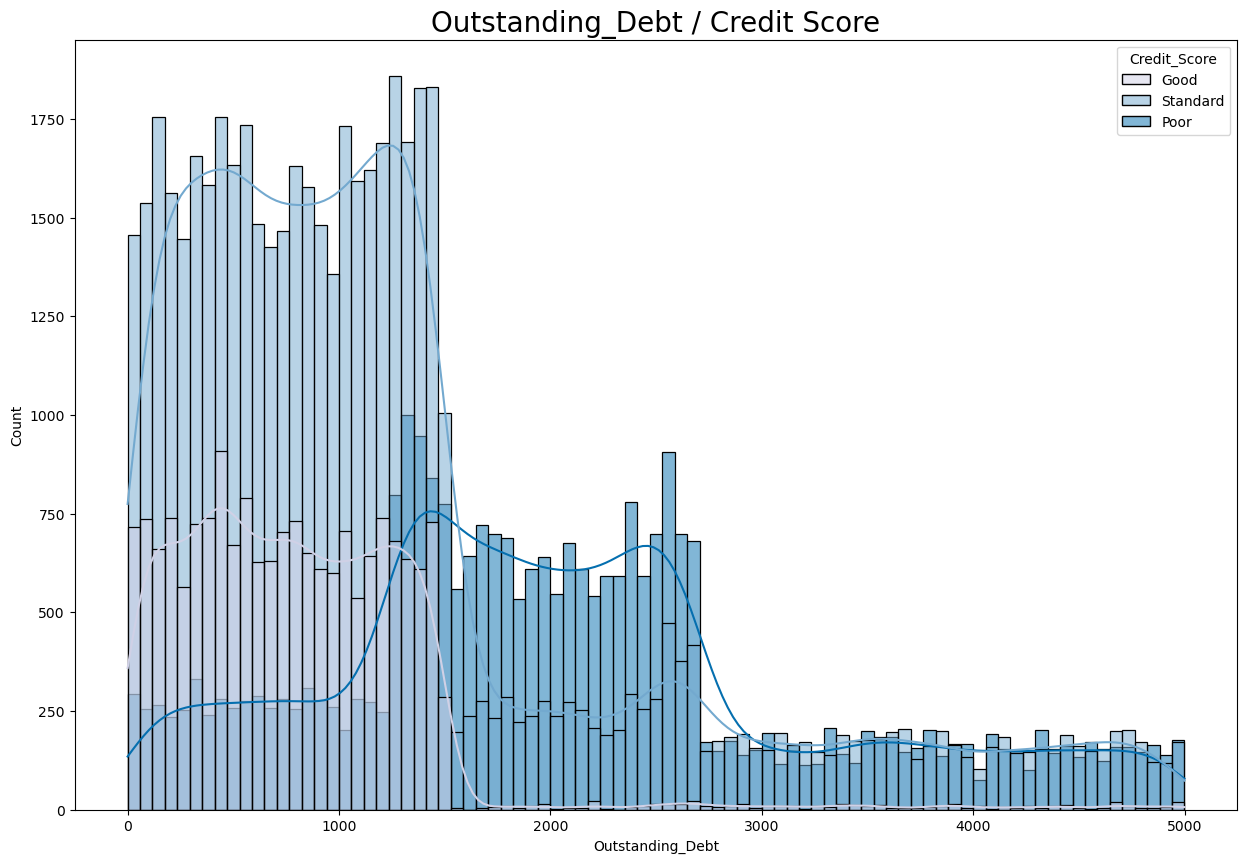

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(x="Outstanding_Debt", hue="Credit_Score", kde= True, data=data, palette="PuBu", edgecolor="black")
plt.title("Outstanding_Debt / Credit Score", fontsize=20)
plt.show()

In [ ]:
#1. People with Credit Score as Poor are more distributed where Outstanding Debt values are higher than those who belong to Standard or Poor. 
#2. Most people with a Good Credit Score do not have more than 1500 Outstanding Debts.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 39 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

Feature 0: 45.937835
Feature 1: 936.994566
Feature 2: 1610.269451
Feature 3: 1561.947205
Feature 4: 6265.640640
Feature 5: 6488.010735
Feature 6: 10299.144625
Feature 7: 5090.600032
Feature 8: 7695.657616
Feature 9: 6036.216167
Feature 10: 1844.391702
Feature 11: 7984.260437
Feature 12: 6157.655338
Feature 13: 80.830623
Feature 14: 6060.812563
Feature 15: 131.997609
Feature 16: 1064.550267
Feature 17: 1403.388708
Feature 18: 815.293544
Feature 19: 695.238090
Feature 20: 699.324826
Feature 21: 655.065261
Feature 22: 680.253511
Feature 23: 830.978481
Feature 24: 719.783987
Feature 25: 697.648966
Feature 26: 697.497034
Feature 27: 690.205262
Feature 28: 895.136737


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


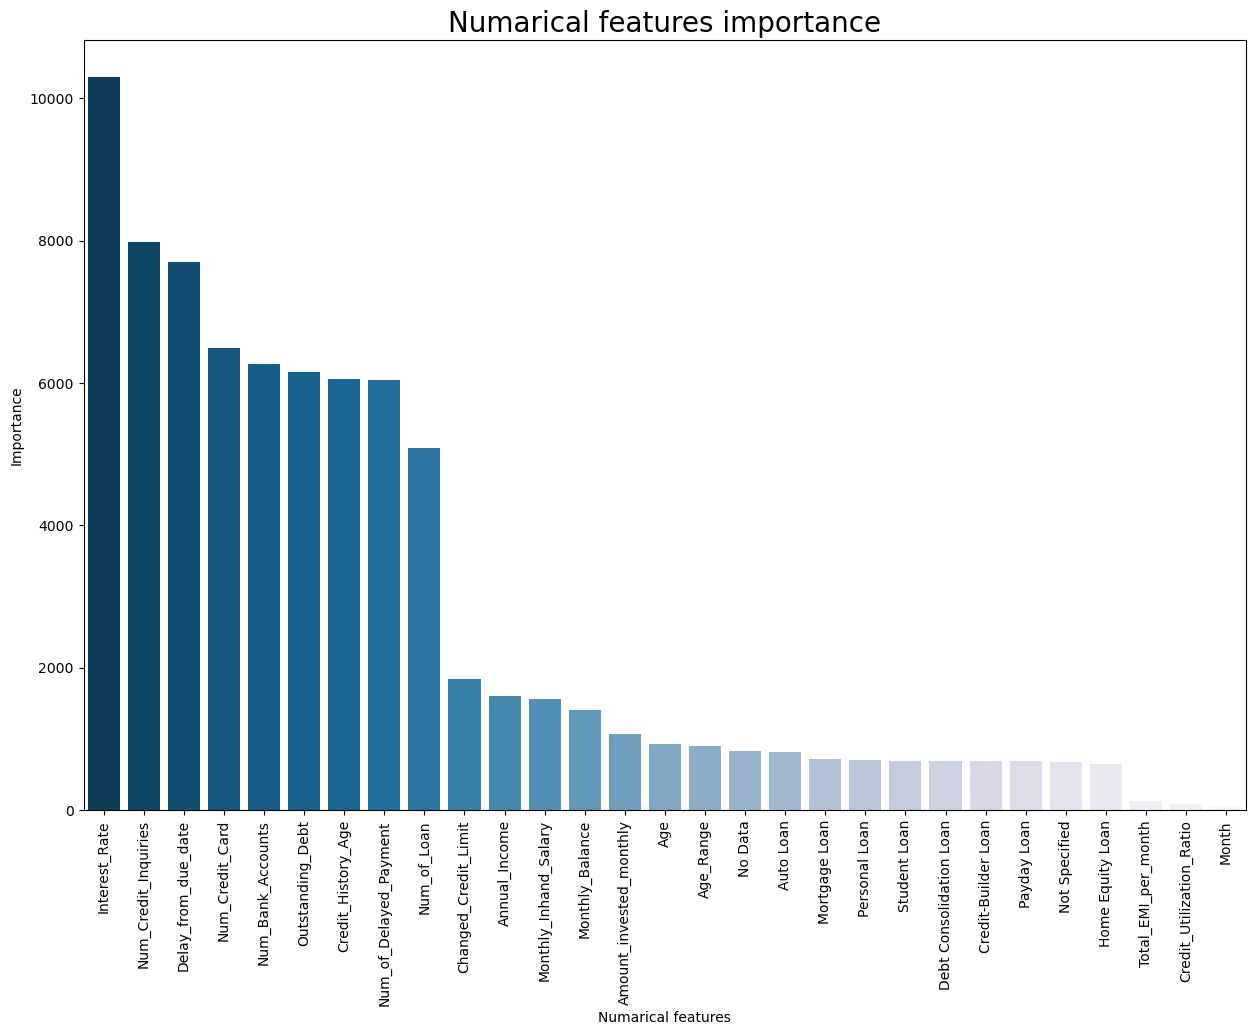

In [ ]:
#numarical features impact on credit score
# feature selection
def  select_features(X_train, y_train, X_test):
 # configure to select all features
 fs = SelectKBest(score_func=f_classif, k='all')
 # learn relationship from training data
 fs.fit(X_train, y_train)
 # transform train input data
 X_train_fs = fs.transform(X_train)
 # transform test input data
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs
X=data.select_dtypes(include='number')
X=X.drop(["ID","Customer_ID","SSN"],axis=1)
y=data["Credit_Score"]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
# sort feature scores in descending order
idxs = np.argsort(fs.scores_)[::-1]

# plot the scores in descending order
plt.figure(figsize=(15,10))
sns.barplot([X.columns[i] for i in idxs], fs.scores_[idxs], palette="PuBu_r")
plt.xticks(rotation=90)
plt.xlabel("Numarical features")
plt.ylabel("Importance")
plt.title("Numarical features importance",fontsize=20)
plt.show()

Feature 0: 815.293544
Feature 1: 695.238090
Feature 2: 699.324826
Feature 3: 655.065261
Feature 4: 680.253511
Feature 5: 830.978481
Feature 6: 719.783987
Feature 7: 697.648966
Feature 8: 697.497034
Feature 9: 690.205262


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


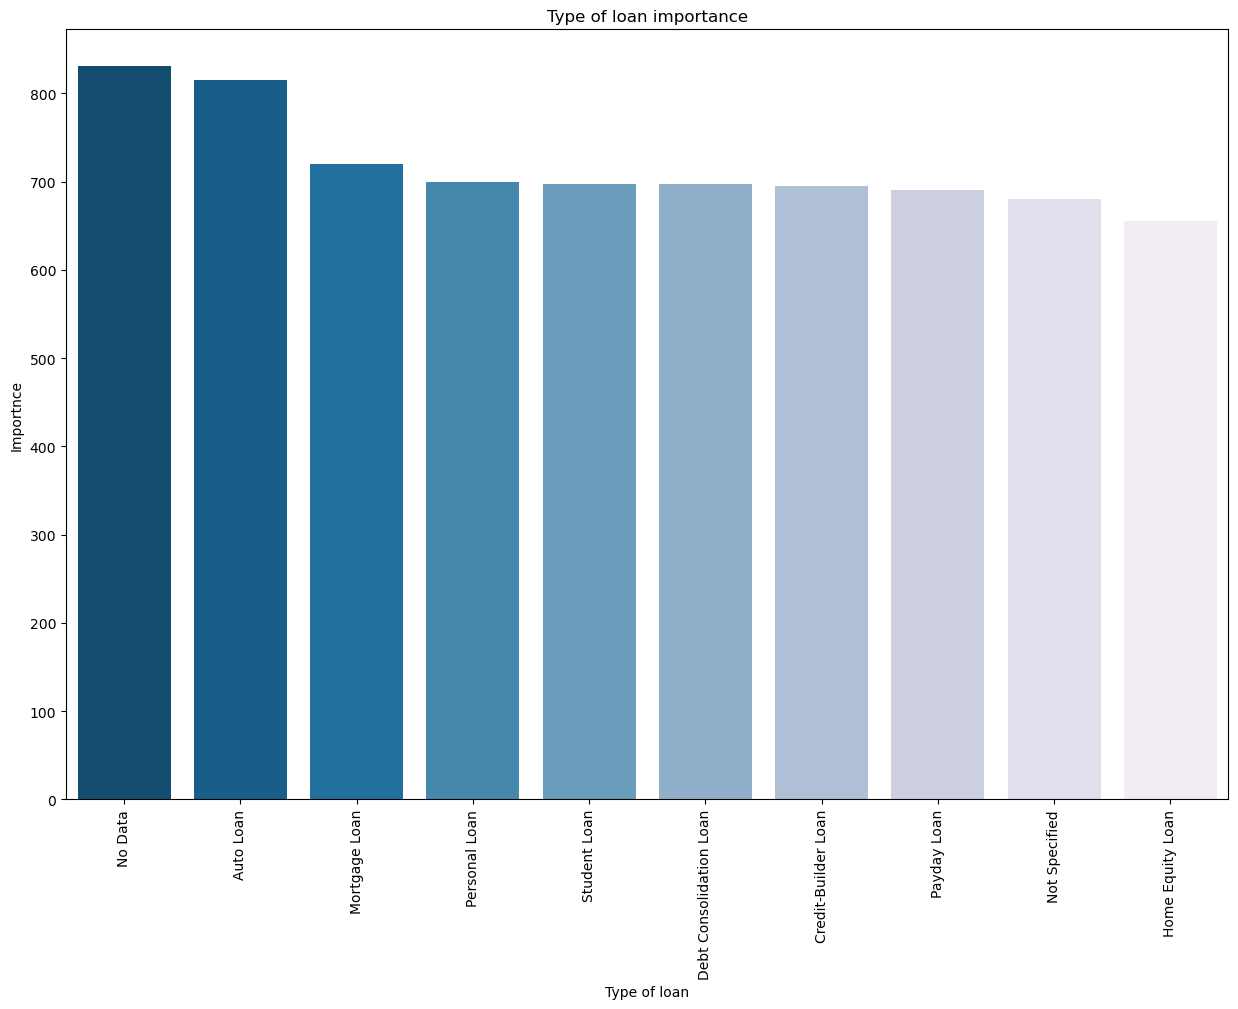

In [ ]:
#Type of loan impact on credit score
X=data[["Auto Loan","Credit-Builder Loan","Personal Loan","Home Equity Loan","Not Specified","No Data","Mortgage Loan","Student Loan","Debt Consolidation Loan","Payday Loan"]]
y=data["Credit_Score"]
def select_features(X_train, y_train, X_test):
 # configure to select all features
 fs = SelectKBest(score_func=f_classif, k='all')
 # learn relationship from training data
 fs.fit(X_train, y_train)
 # transform train input data
 X_train_fs = fs.transform(X_train)
 # transform test input data
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
idxs = np.argsort(fs.scores_)[::-1]

# plot the scores in descending order
plt.figure(figsize=(15,10))
sns.barplot([X.columns[i] for i in idxs], fs.scores_[idxs], palette="PuBu_r")
plt.xticks(rotation=90)

plt.xlabel("Type of loan")
plt.ylabel("Importnce")
plt.title("Type of loan importance")
plt.show()

Feature 0: 45.937835
Feature 1: 936.994566
Feature 2: 1610.269451
Feature 3: 1561.947205
Feature 4: 6265.640640
Feature 5: 6488.010735
Feature 6: 10299.144625
Feature 7: 5090.600032
Feature 8: 7695.657616
Feature 9: 6036.216167
Feature 10: 1844.391702
Feature 11: 7984.260437
Feature 12: 6157.655338
Feature 13: 80.830623
Feature 14: 6060.812563
Feature 15: 131.997609
Feature 16: 1064.550267
Feature 17: 1403.388708
Feature 18: 815.293544
Feature 19: 695.238090
Feature 20: 699.324826
Feature 21: 655.065261
Feature 22: 680.253511
Feature 23: 830.978481
Feature 24: 719.783987
Feature 25: 697.648966
Feature 26: 697.497034
Feature 27: 690.205262
Feature 28: 895.136737
Feature 29: 5.535892
Feature 30: 0.493387
Feature 31: 4.677881
Feature 32: 5.640246
Feature 33: 2.177363
Feature 34: 1.705794
Feature 35: 3.311022
Feature 36: 0.042868
Feature 37: 3.314076
Feature 38: 6.891441
Feature 39: 2.317515
Feature 40: 5.914707
Feature 41: 1.836774
Feature 42: 23.584469
Feature 43: 13692.209216
Feature 44

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


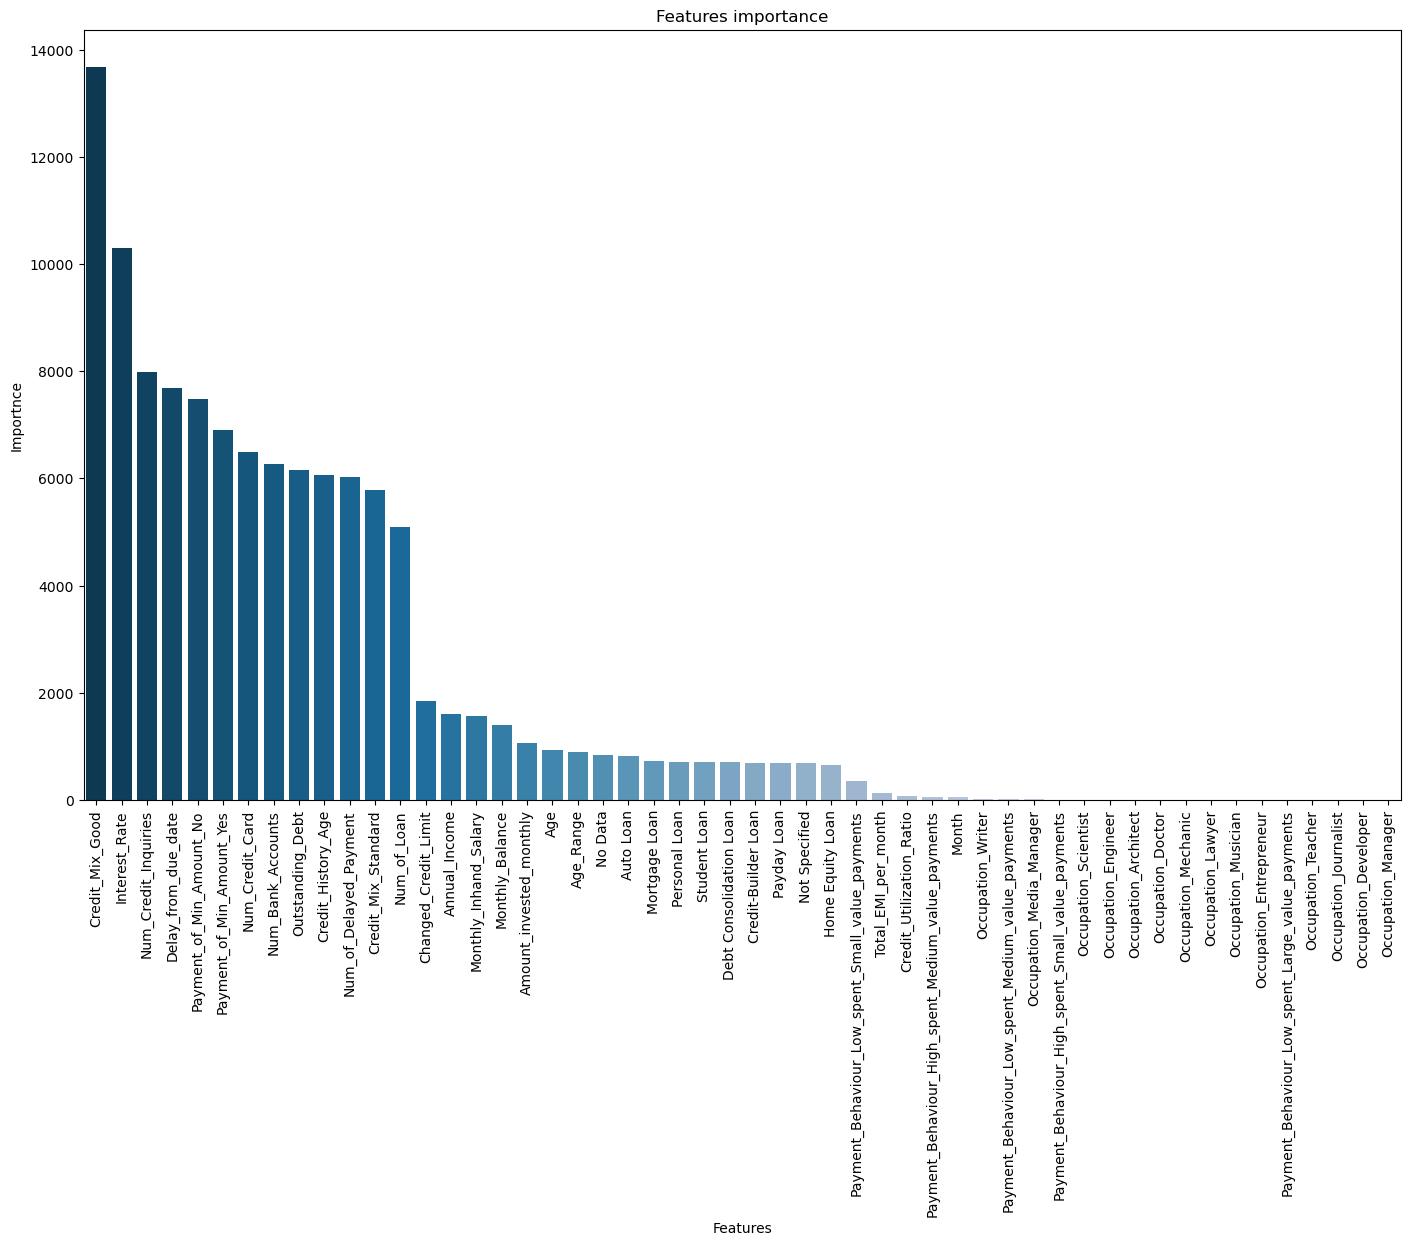

In [ ]:
#features impact on credit score
df= pd.get_dummies(data, columns=["Occupation", "Credit_Mix", "Payment_of_Min_Amount", "Payment_Behaviour"], drop_first=True)
X=df.drop(["ID", "Customer_ID", "Name", "SSN","Credit_Score","Type_of_Loan"],axis=1)
y=data["Credit_Score"]
def select_features(X_train, y_train, X_test):
 # configure to select all features
 fs = SelectKBest(score_func=f_classif,k="all")
 # learn relationship from training data
 fs.fit(X_train, y_train)
 # transform train input data
 X_train_fs = fs.transform(X_train)
 # transform test input data
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
idxs = np.argsort(fs.scores_)[::-1]
plt.figure(figsize=(17,10))

sns.barplot([X.columns[i] for i in idxs], fs.scores_[idxs], palette="PuBu_r")
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importnce")
plt.title("Features importance")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 58 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   ID                                                  100000 non-null  int64  
 1   Customer_ID                                         100000 non-null  int64  
 2   Month                                               100000 non-null  int64  
 3   Name                                                100000 non-null  object 
 4   Age                                                 100000 non-null  float64
 5   SSN                                                 100000 non-null  float64
 6   Annual_Income                                       100000 non-null  float64
 7   Monthly_Inhand_Salary                               100000 non-null  float64
 8   Num_Bank_Accounts                                   100000 non-nu

Feature 0: 6265.640640
Feature 1: 6488.010735
Feature 2: 10299.144625
Feature 3: 5090.600032
Feature 4: 7695.657616
Feature 5: 6036.216167
Feature 6: 7984.260437
Feature 7: 6157.655338
Feature 8: 6060.812563
Feature 9: 13692.209216
Feature 10: 5778.259047
Feature 11: 7481.921487
Feature 12: 6914.328156


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


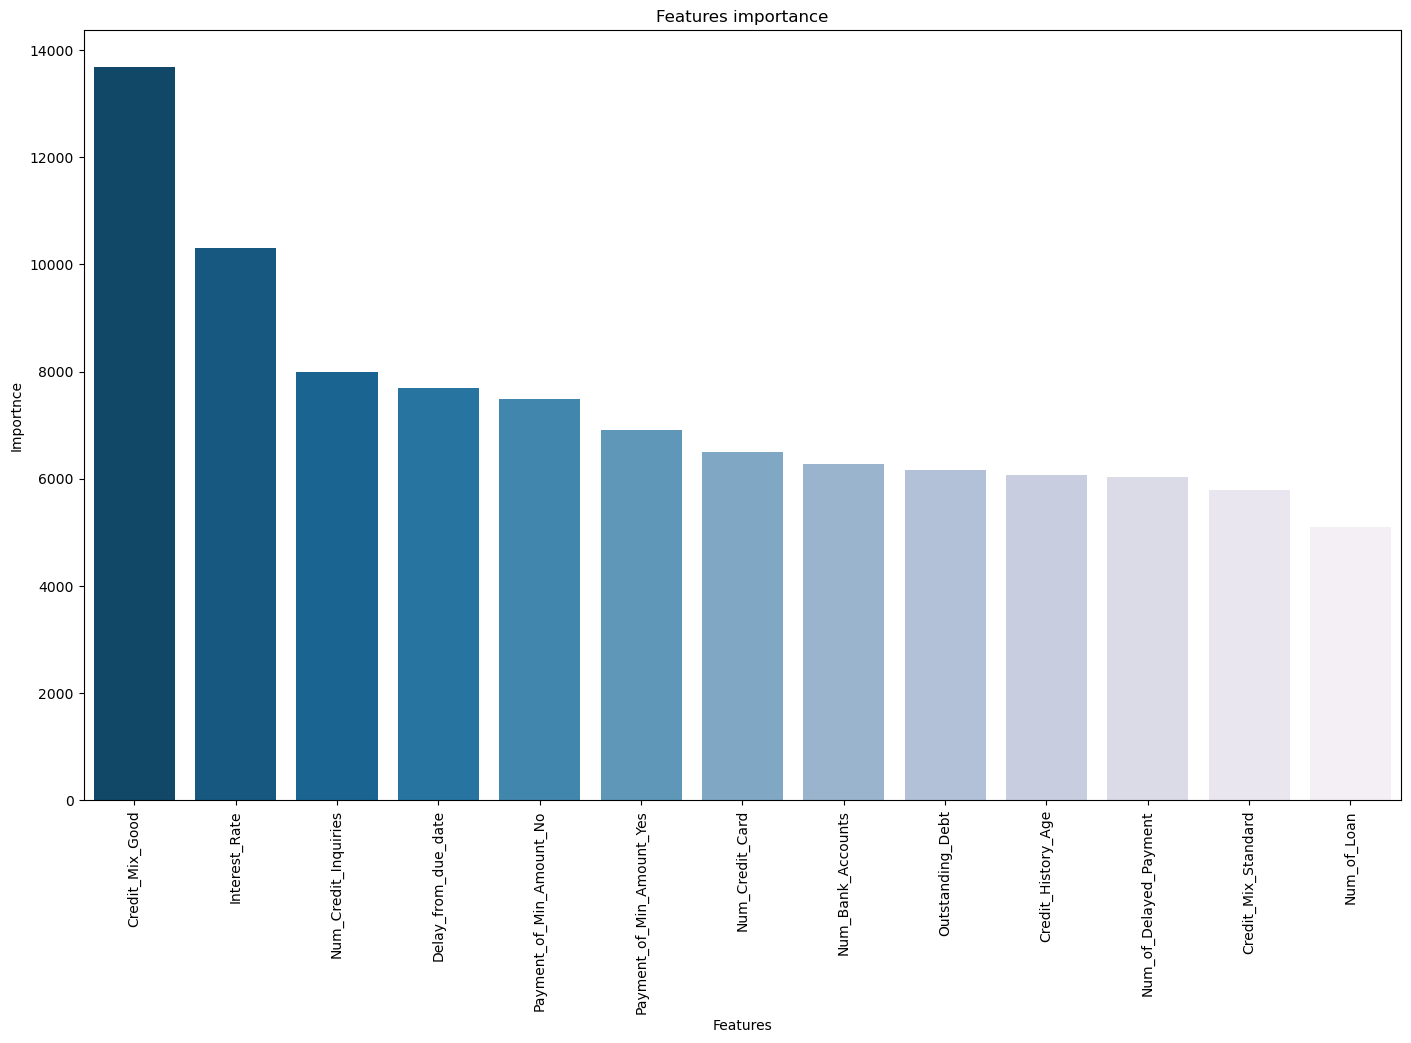

In [ ]:
#features impact on credit score
df= pd.get_dummies(data, columns=["Occupation", "Credit_Mix", "Payment_of_Min_Amount", "Payment_Behaviour"], drop_first=True)
X=df[["Num_Bank_Accounts","Num_Credit_Card","Interest_Rate","Num_of_Loan","Delay_from_due_date","Num_of_Delayed_Payment","Num_Credit_Inquiries","Outstanding_Debt","Credit_History_Age","Credit_Mix_Good","Credit_Mix_Standard","Payment_of_Min_Amount_No","Payment_of_Min_Amount_Yes"]]
y=data["Credit_Score"]
def select_features(X_train, y_train, X_test):
 # configure to select all features
 fs = SelectKBest(score_func=f_classif, k='all')
 # learn relationship from training data
 fs.fit(X_train, y_train)
 # transform train input data
 X_train_fs = fs.transform(X_train)
 # transform test input data
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
idxs = np.argsort(fs.scores_)[::-1]
plt.figure(figsize=(17,10))

sns.barplot([X.columns[i] for i in idxs], fs.scores_[idxs], palette="PuBu_r")
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importnce")
plt.title("Features importance")
plt.show()